# Exploratory Data Analysis

## Dataset overview

In [1]:
#Importamos las librerias principales
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 

In [42]:
#Cargamos dataset a utilizar
df_entrada = pd.read_csv("../data/ds_gasto_3_final.csv", sep=";")

In [43]:
df_entrada.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 627803 entries, 0 to 627802
Data columns (total 30 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   ANIO                            627803 non-null  int64  
 1   NIVEL                           627803 non-null  int64  
 2   NIVEL_GOBIERNO                  627803 non-null  object 
 3   DPTO                            627803 non-null  int64  
 4   DEPARTAMENTO_EJECUTORA_NOMBRE   627803 non-null  object 
 5   FUNCION                         627803 non-null  int64  
 6   FUNCION_NOMBRE                  627803 non-null  object 
 7   PIA                             627803 non-null  int64  
 8   PIM                             627803 non-null  int64  
 9   DEVENGADO                       627803 non-null  float64
 10  IP                              627803 non-null  float64
 11  CAMBIO_GOBIERNO_NACIONAL        627803 non-null  int64  
 12  NRO_PRESIDENTES_

    intervalo  frecuencia
0   0.00-0.05      128322
1   0.05-0.10        8771
2   0.10-0.15        6184
3   0.15-0.20        5558
4   0.20-0.25        5771
5   0.25-0.30        7080
6   0.30-0.35        6066
7   0.35-0.40        6436
8   0.40-0.45        7329
9   0.45-0.50        7830
10  0.50-0.55       10342
11  0.55-0.60        9729
12  0.60-0.65        9709
13  0.65-0.70       12139
14  0.70-0.75       12844
15  0.75-0.80       15432
16  0.80-0.85       20658
17  0.85-0.90       26931
18  0.90-0.95       41344
19  0.95-1.00      279328


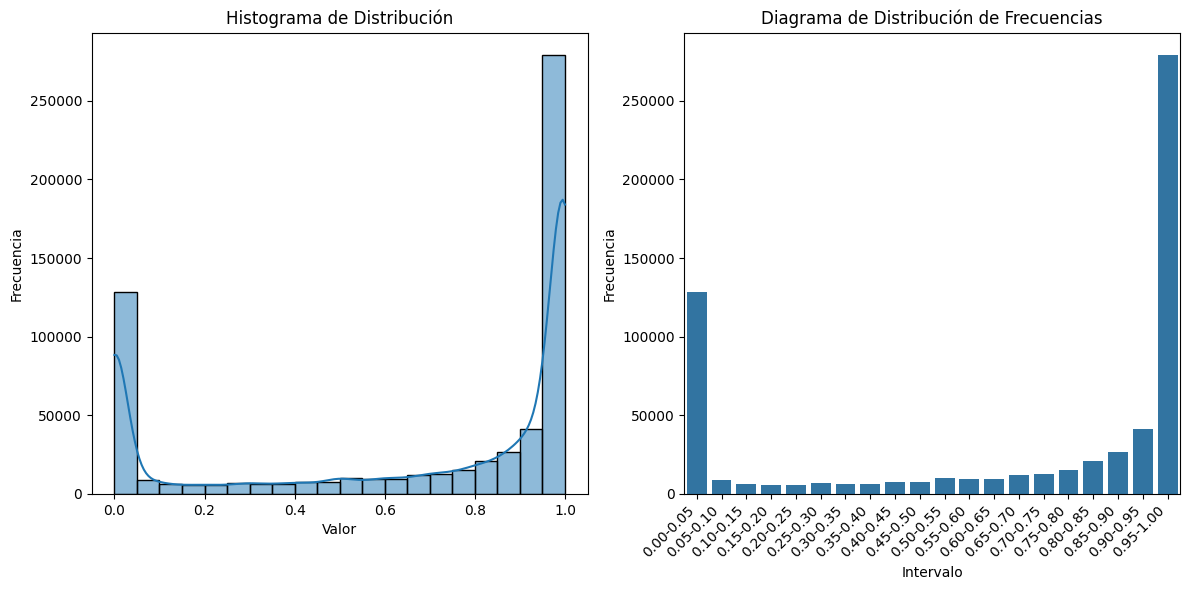

In [44]:

# Calcular la distribución de frecuencias
num_bins = 20  # Puedes ajustar este número según necesites
hist, bin_edges = np.histogram(df_entrada['AVANCE'], bins=num_bins, range=(0, 1))

# Crear un DataFrame con los resultados para facilitar la visualización
hist_df = pd.DataFrame({
    'intervalo': [f'{bin_edges[i]:.2f}-{bin_edges[i+1]:.2f}' for i in range(len(bin_edges)-1)],
    'frecuencia': hist
})

# Imprimir la tabla de frecuencias
print(hist_df)

# Visualización
plt.figure(figsize=(12, 6))

# Histograma
plt.subplot(1, 2, 1)
sns.histplot(data=df_entrada, x='AVANCE', bins=num_bins, kde=True)
plt.title('Histograma de Distribución')
plt.xlabel('Valor')
plt.ylabel('Frecuencia')

# Gráfico de barras de frecuencia
plt.subplot(1, 2, 2)
sns.barplot(data=hist_df, x='intervalo', y='frecuencia')
plt.title('Diagrama de Distribución de Frecuencias')
plt.xlabel('Intervalo')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

   ANIO  NIVEL NIVEL_GOBIERNO  DPTO DEPARTAMENTO_EJECUTORA_NOMBRE  FUNCION  \
0  2017      2              R     1                      AMAZONAS       15   
1  2023      2              R     1                      AMAZONAS       15   
2  2016      2              R     1                      AMAZONAS       15   
3  2020      2              R     1                      AMAZONAS       15   
4  2019      2              R     1                      AMAZONAS       15   

  FUNCION_NOMBRE  PIA     PIM  DEVENGADO  ...  EJECUTORA  PROYECTO_EDAD_NETA  \
0     TRANSPORTE    0   79983   79982.76  ...        721                   6   
1     TRANSPORTE    0   57539   57537.81  ...        721                   6   
2     TRANSPORTE    0  160000  159965.52  ...        721                   6   
3     TRANSPORTE    0   41528   40326.67  ...        721                   6   
4     TRANSPORTE    0  914962  642811.24  ...        721                   6   

   PROYECTO_EDAD_BRUTA  IGEIP_EJECUCION  P_INCO_AV

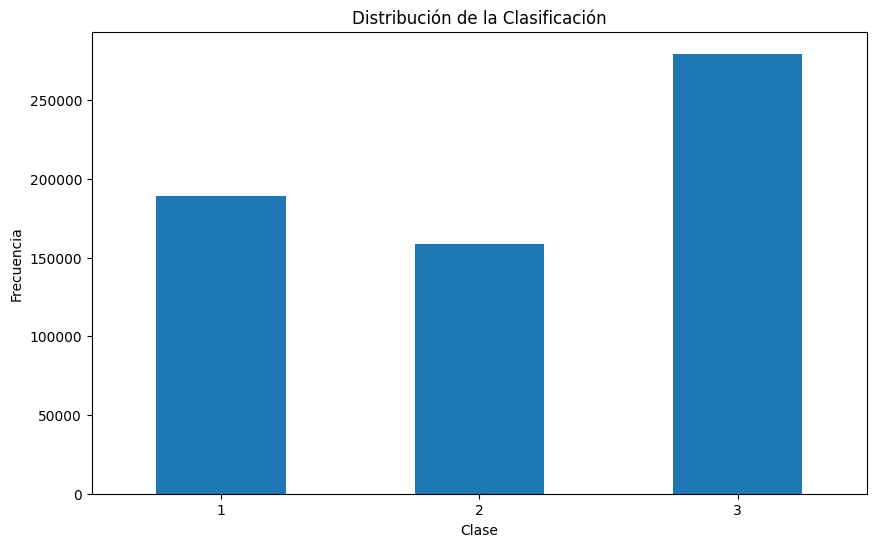

In [45]:
# Crear la nueva columna 'clasificacion' usando np.select
condiciones = [
    (df_entrada['AVANCE'] >= 0.95),
    (df_entrada['AVANCE'] >= 0.5) & (df_entrada['AVANCE'] < 0.95),
    (df_entrada['AVANCE'] < 0.5)
]

valores = [3, 2, 1]

df_entrada['clasificacion'] = np.select(condiciones, valores, default=0)

# Mostrar las primeras filas del DataFrame para verificar
print(df_entrada.head())

# Mostrar un resumen de la nueva columna
print(df_entrada['clasificacion'].value_counts().sort_index())

# Opcional: Visualizar la distribución de la nueva clasificación
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
df_entrada['clasificacion'].value_counts().sort_index().plot(kind='bar')
plt.title('Distribución de la Clasificación')
plt.xlabel('Clase')
plt.ylabel('Frecuencia')
plt.xticks(rotation=0)
plt.show()

In [12]:
df_entrada.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 627870 entries, 0 to 627869
Data columns (total 27 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   ANIO                            627870 non-null  int64  
 1   NIVEL                           627870 non-null  int64  
 2   NIVEL_GOBIERNO                  627870 non-null  object 
 3   DPTO                            627870 non-null  int64  
 4   DEPARTAMENTO_EJECUTORA_NOMBRE   627870 non-null  object 
 5   FUNCION                         627870 non-null  int64  
 6   FUNCION_NOMBRE                  627870 non-null  object 
 7   PIA                             627870 non-null  int64  
 8   PIM                             627870 non-null  int64  
 9   DEVENGADO                       627870 non-null  float64
 10  IP                              627870 non-null  float64
 11  CAMBIO_GOBIERNO_NACIONAL        627870 non-null  int64  
 12  NRO_PRESIDENTES_

In [25]:
#df_entrada.drop(df_entrada.columns[0], axis=1, inplace=True)


In [5]:
df_entrada.head()

,ANIO,NIVEL,NIVEL_GOBIERNO,DPTO,DEPARTAMENTO_EJECUTORA_NOMBRE,FUNCION,FUNCION_NOMBRE,PIA,PIM,DEVENGADO,...,EJECUTORA,PROYECTO_EDAD_NETA,PROYECTO_EDAD_BRUTA,IGEIP_EJECUCION,P_INCO_AVG,NEJE_PUNTAJEIRI,NRO_EJECUTORAS_X_PROYECTO,AVANCE,CLASE,clasificacion
0,2017,2,R,1,AMAZONAS,15,TRANSPORTE,0,79983,79982.76,...,721,6,8,0.629,51.47,36.305761,1,1.0000,1,3
1,2023,2,R,1,AMAZONAS,15,TRANSPORTE,0,57539,57537.81,...,721,6,8,0.629,51.47,36.305761,1,1.0000,1,3
2,2016,2,R,1,AMAZONAS,15,TRANSPORTE,0,160000,159965.52,...,721,6,8,0.629,51.47,36.305761,1,0.9998,1,3
3,2020,2,R,1,AMAZONAS,15,TRANSPORTE,0,41528,40326.67,...,721,6,8,0.629,51.47,36.305761,1,0.9711,1,3
4,2019,2,R,1,AMAZONAS,15,TRANSPORTE,0,914962,642811.24,...,721,6,8,0.629,51.47,36.305761,1,0.7026,0,2


## Analisis de variables Categoricas y Numericas

In [29]:
(
    df_entrada
    .astype({
        'ANIO': 'category',
        'NIVEL': 'category',
        'NIVEL_GOBIERNO': 'category',
        'DEPARTAMENTO_EJECUTORA_NOMBRE': 'category',
        'FUNCION_NOMBRE': 'category',
        'TIPO_GOBIERNO_NACIONAL': 'category',
        'EJECUTORA': 'category',
    })
).describe(include='category')

,ANIO,NIVEL,NIVEL_GOBIERNO,DEPARTAMENTO_EJECUTORA_NOMBRE,FUNCION_NOMBRE,TIPO_GOBIERNO_NACIONAL,EJECUTORA
count,627870,627870,627870,627870,627870,627870,627870
unique,12,3,3,25,25,3,2536
top,2022,3,M,LIMA,TRANSPORTE,Centro derecha,1443
freq,62912,508013,508013,97096,135731,257753,7948


<Axes: title={'center': 'Distribución de registros por año'}, xlabel='Año', ylabel='Cantidad de registros'>

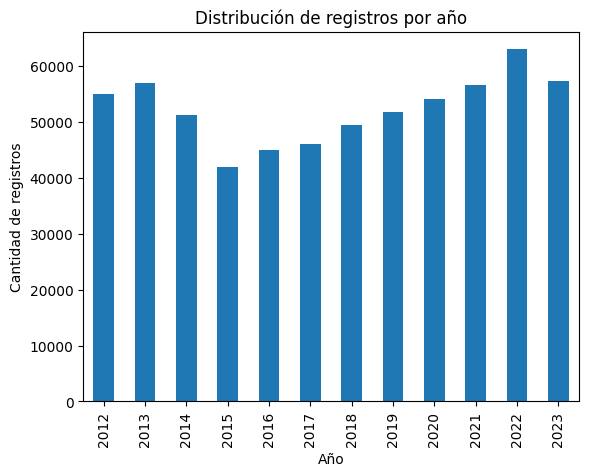

In [6]:
(
    df_entrada
    .ANIO
    .value_counts()
    .sort_index() # Ordena los valores por el índice (anio)
    .plot(
        kind='bar',
        title='Distribución de registros por año',
        xlabel='Año',
        ylabel='Cantidad de registros'
    )
)

### Distribucion

In [10]:
columnas_categoricas = ['ANIO','NIVEL_GOBIERNO', 'DEPARTAMENTO_EJECUTORA_NOMBRE', 'FUNCION_NOMBRE', 'TIPO_GOBIERNO_NACIONAL', 'CAMBIO_GOBIERNO_REGIONAL_LOCAL', 'ELECCION_REGIONAL_LOCAL']

C:\Users\ycald\AppData\Local\Temp\ipykernel_22360\3968217272.py:6: UserWarning: 
The palette list has fewer values (10) than needed (12) and will cycle, which may produce an uninterpretable plot.
  sns.countplot(


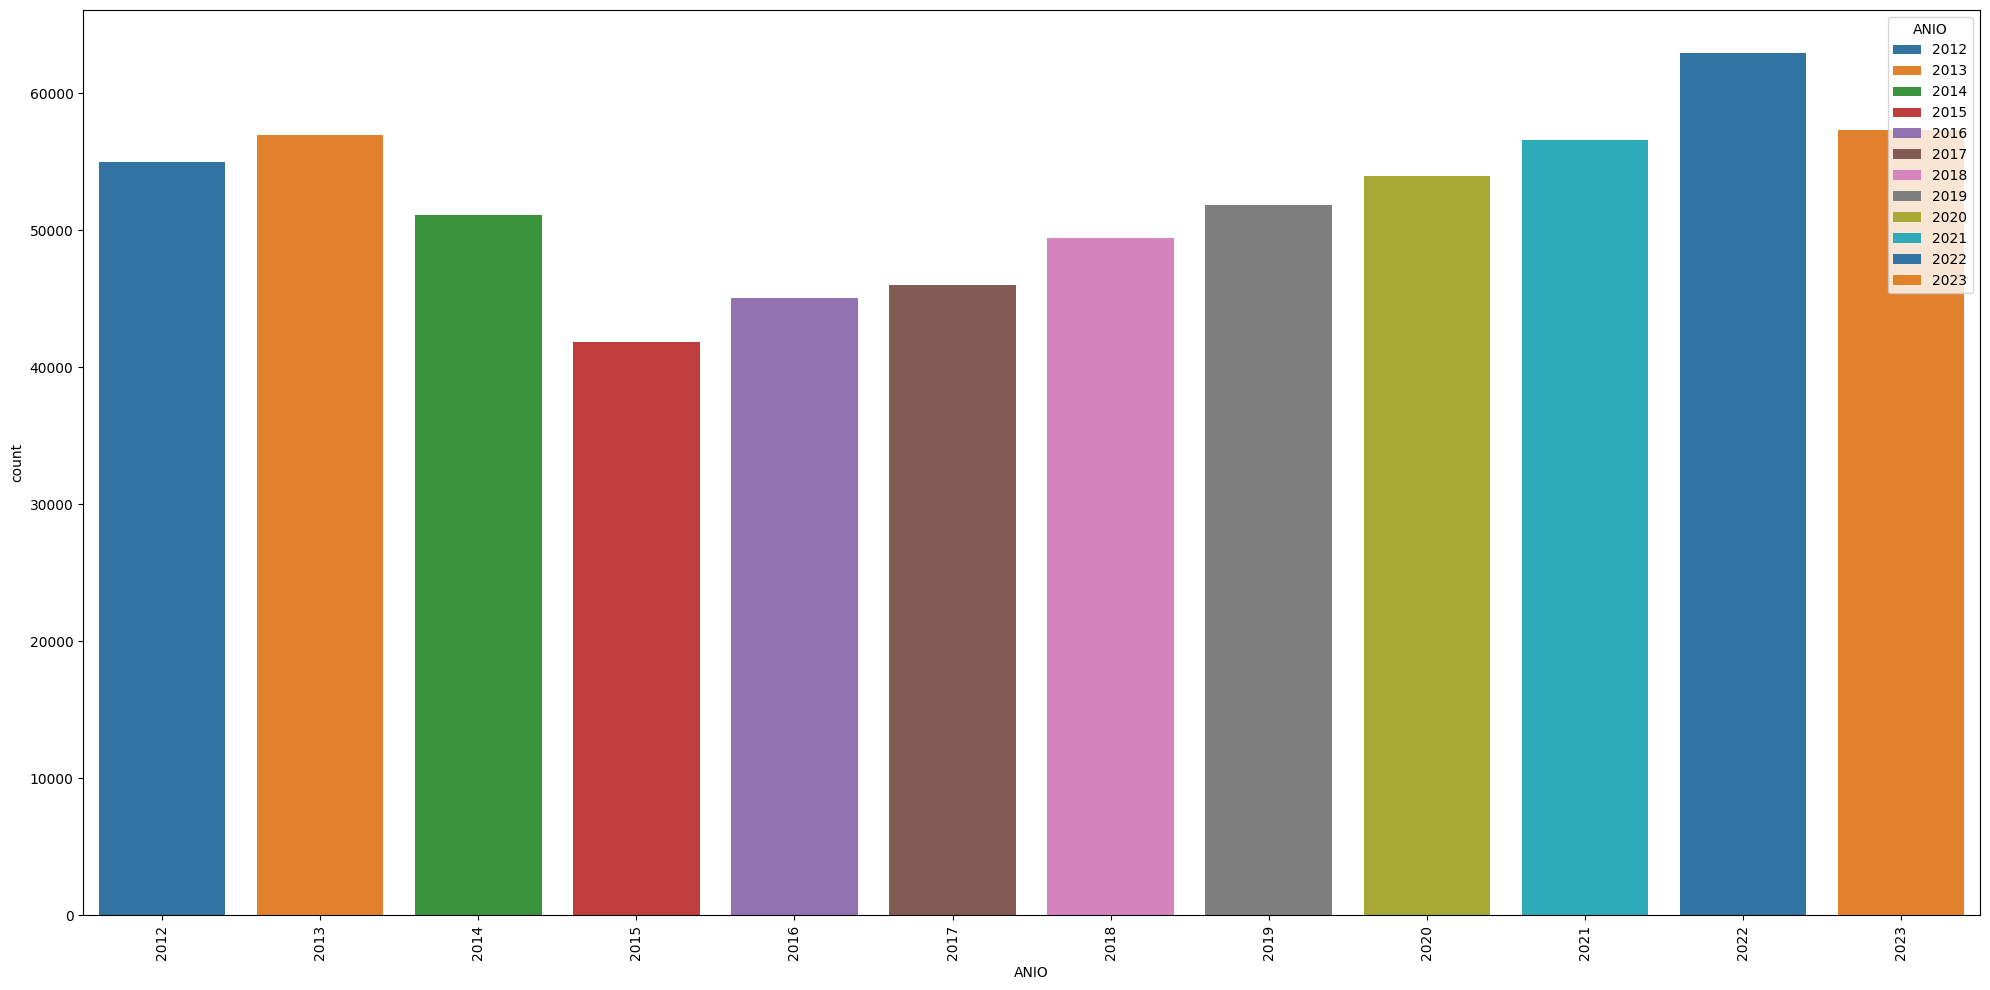

C:\Users\ycald\AppData\Local\Temp\ipykernel_22360\3968217272.py:6: UserWarning: The palette list has more values (10) than needed (3), which may not be intended.
  sns.countplot(


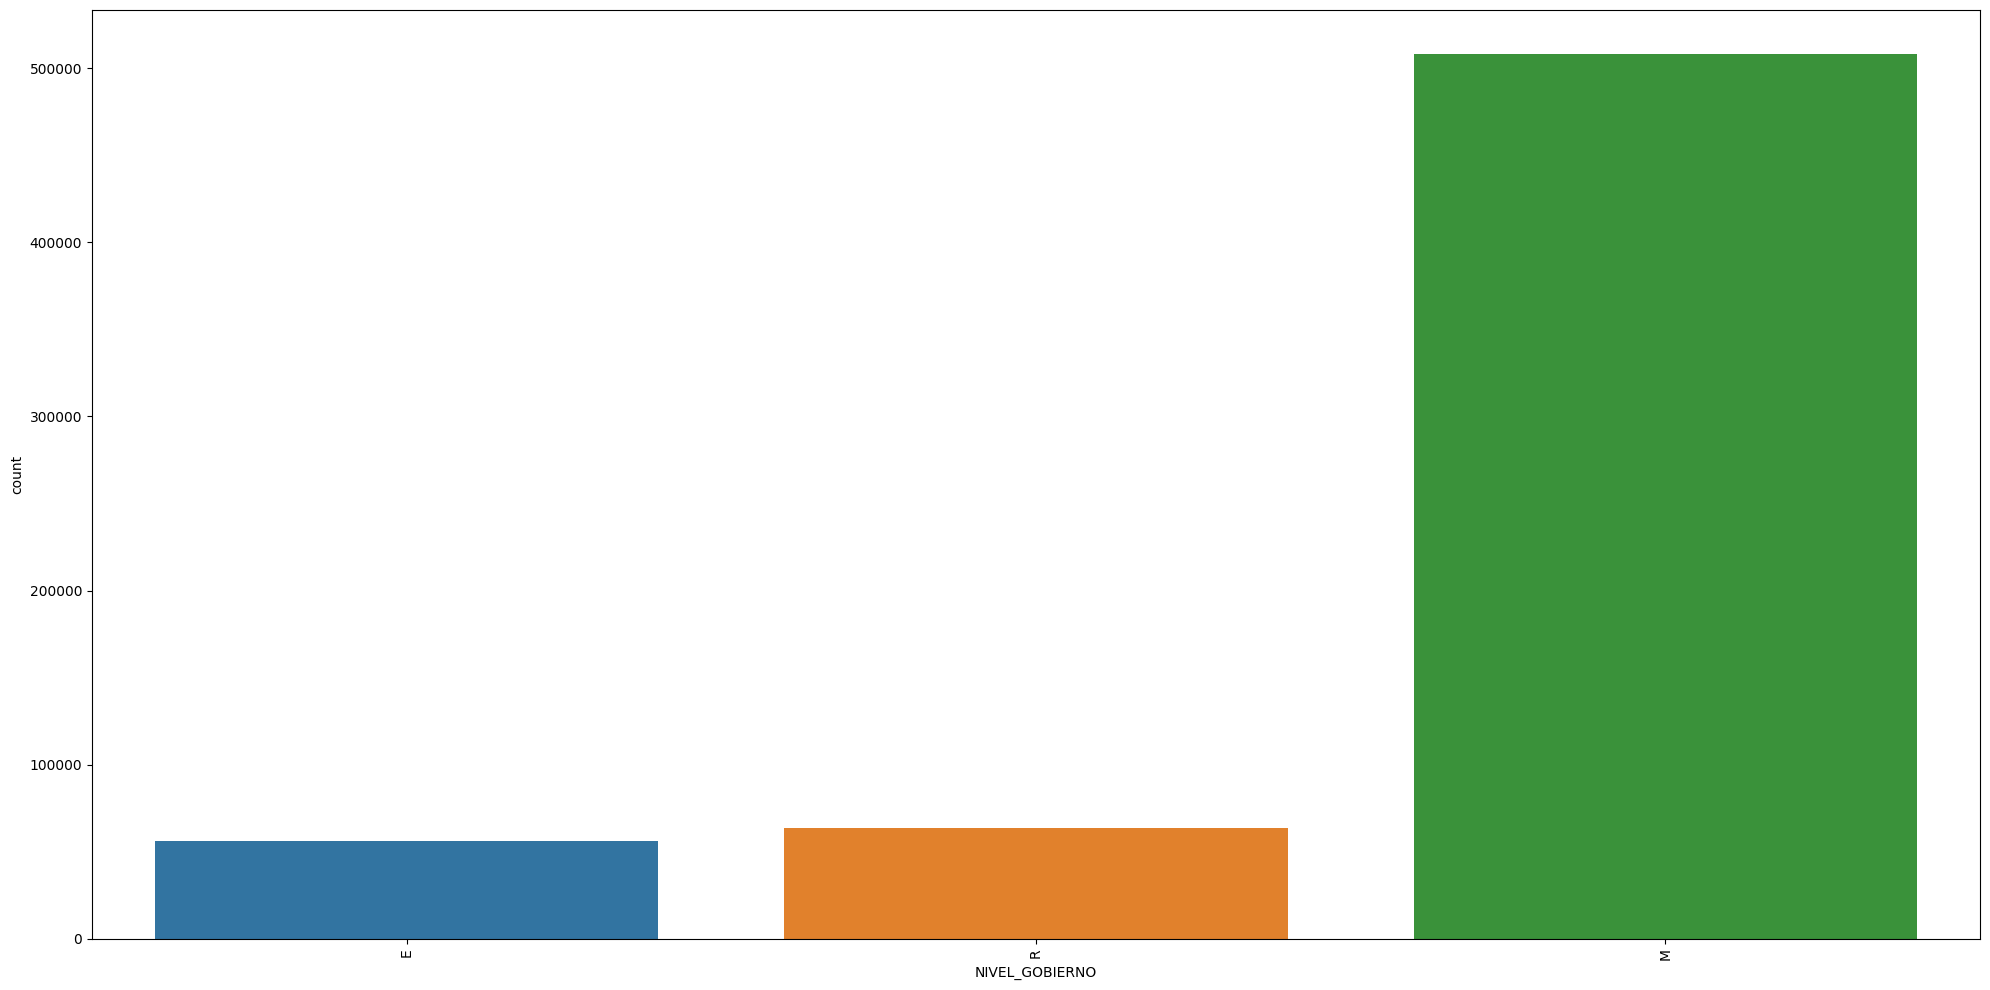

C:\Users\ycald\AppData\Local\Temp\ipykernel_22360\3968217272.py:6: UserWarning: 
The palette list has fewer values (10) than needed (25) and will cycle, which may produce an uninterpretable plot.
  sns.countplot(


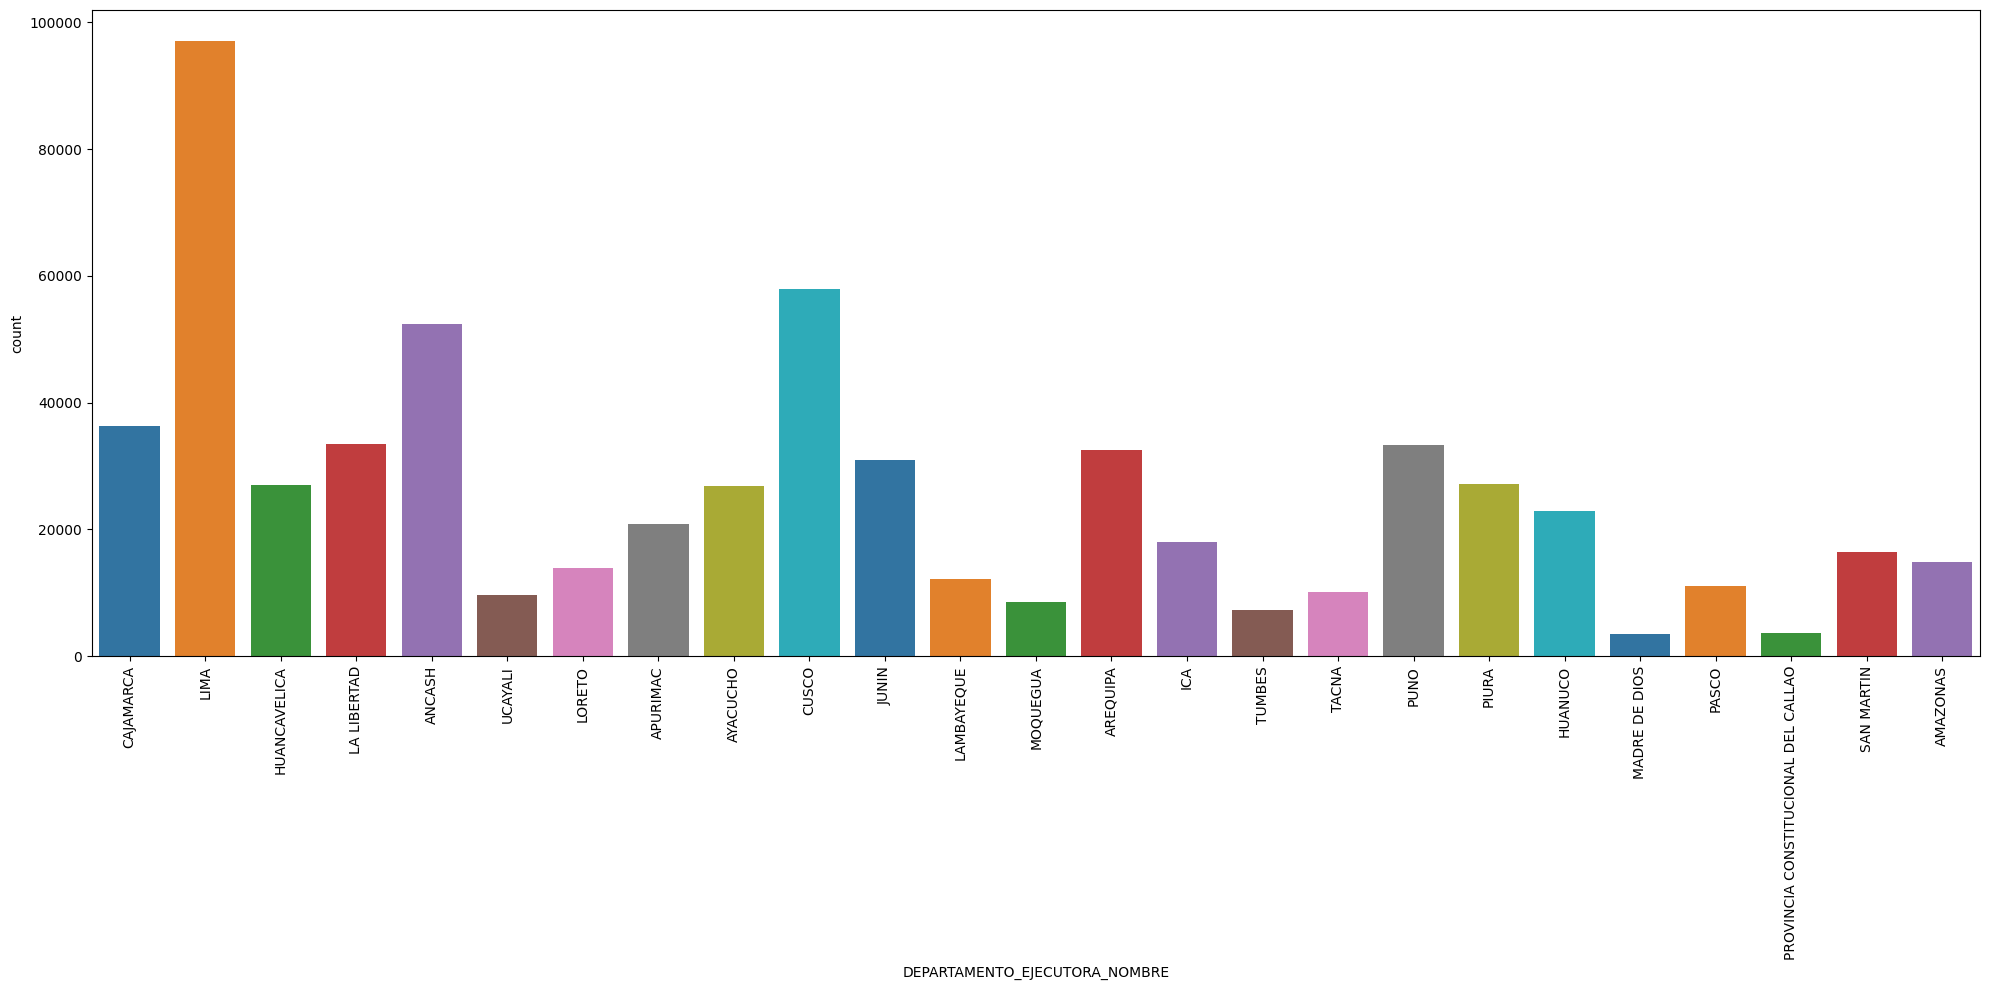

C:\Users\ycald\AppData\Local\Temp\ipykernel_22360\3968217272.py:6: UserWarning: 
The palette list has fewer values (10) than needed (25) and will cycle, which may produce an uninterpretable plot.
  sns.countplot(


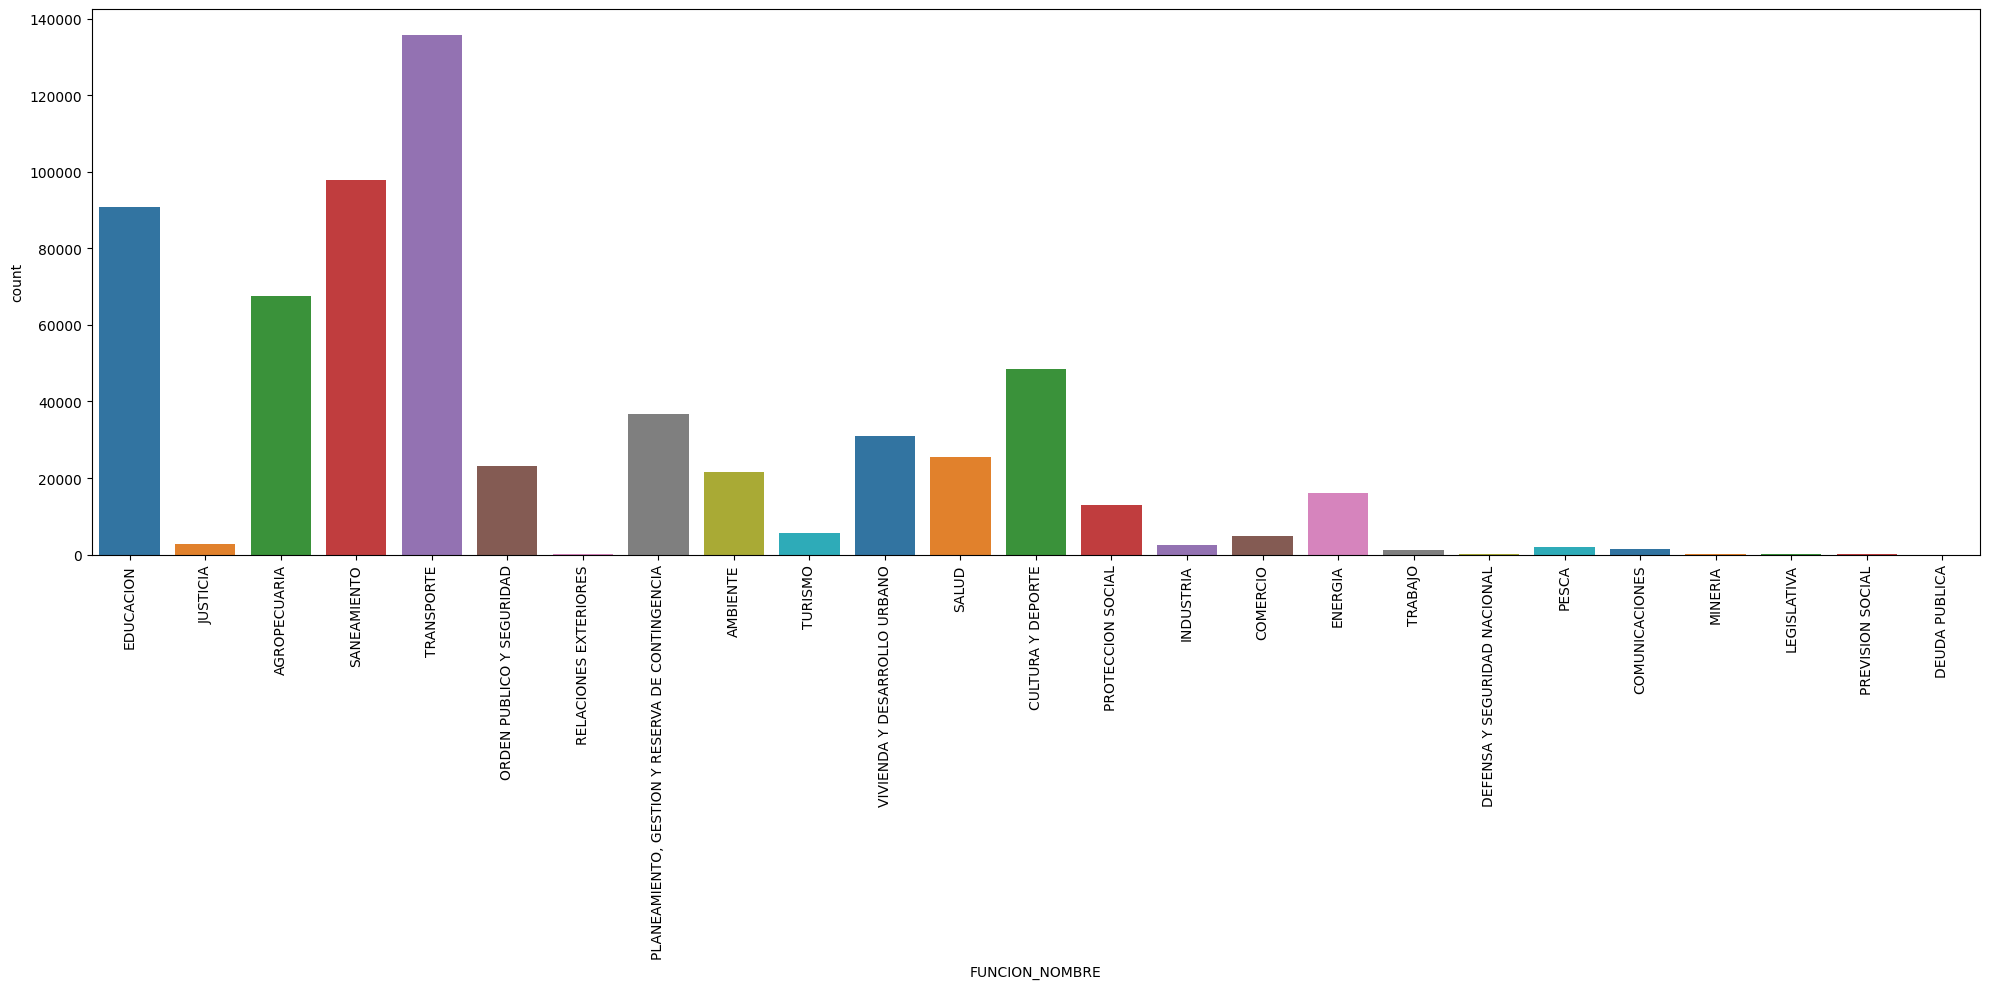

C:\Users\ycald\AppData\Local\Temp\ipykernel_22360\3968217272.py:6: UserWarning: The palette list has more values (10) than needed (3), which may not be intended.
  sns.countplot(


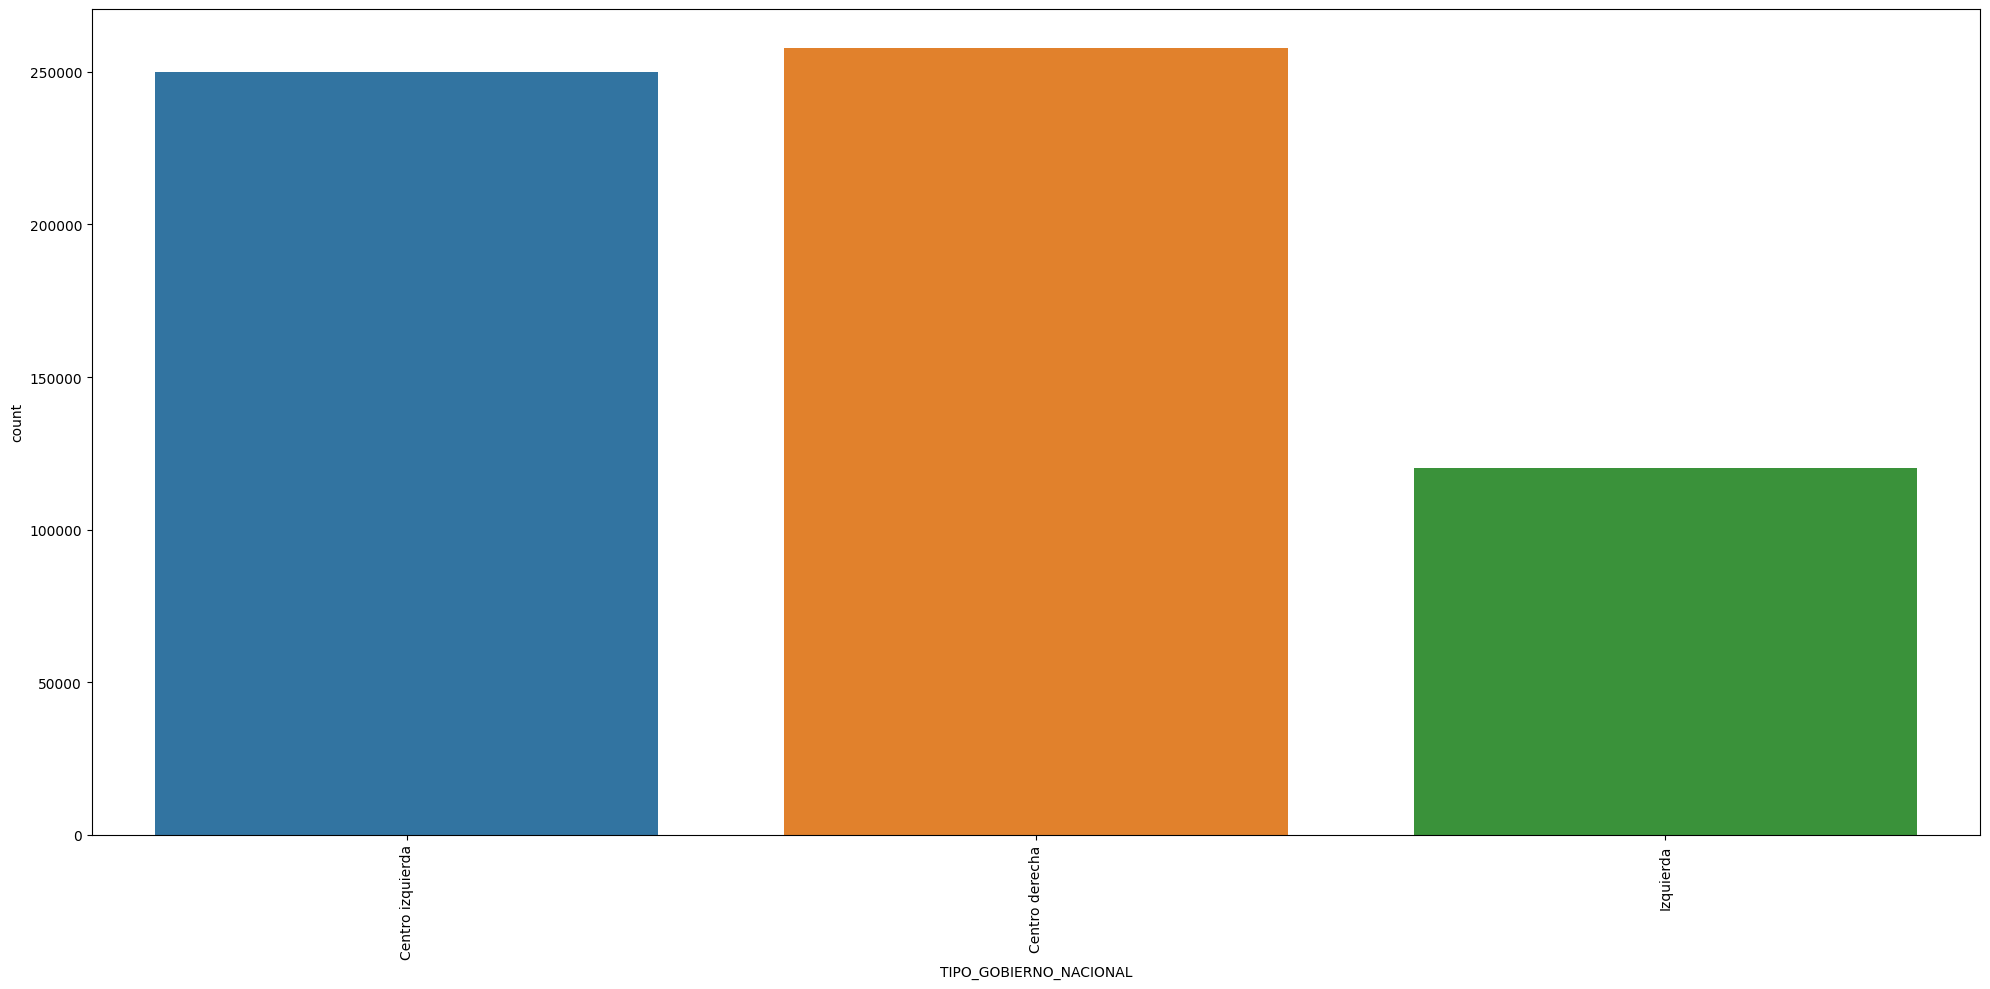

C:\Users\ycald\AppData\Local\Temp\ipykernel_22360\3968217272.py:6: UserWarning: The palette list has more values (10) than needed (2), which may not be intended.
  sns.countplot(


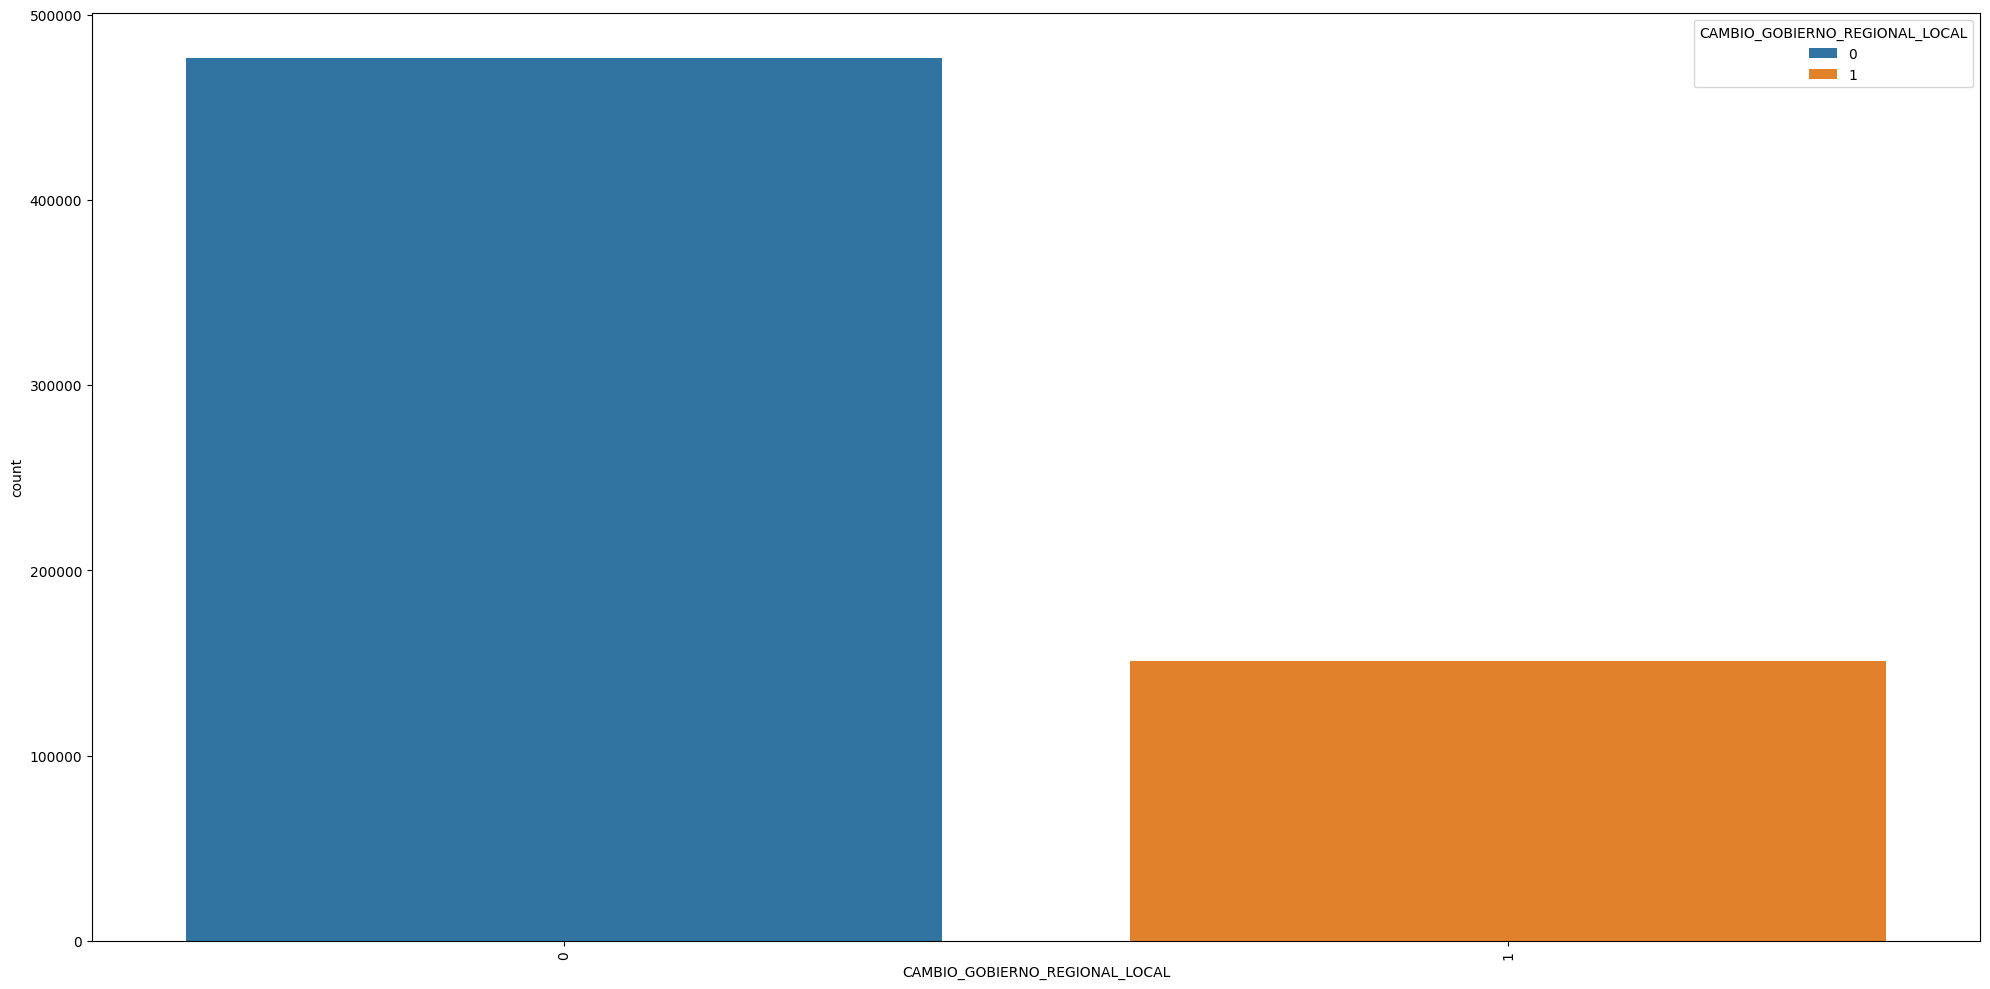

C:\Users\ycald\AppData\Local\Temp\ipykernel_22360\3968217272.py:6: UserWarning: The palette list has more values (10) than needed (2), which may not be intended.
  sns.countplot(


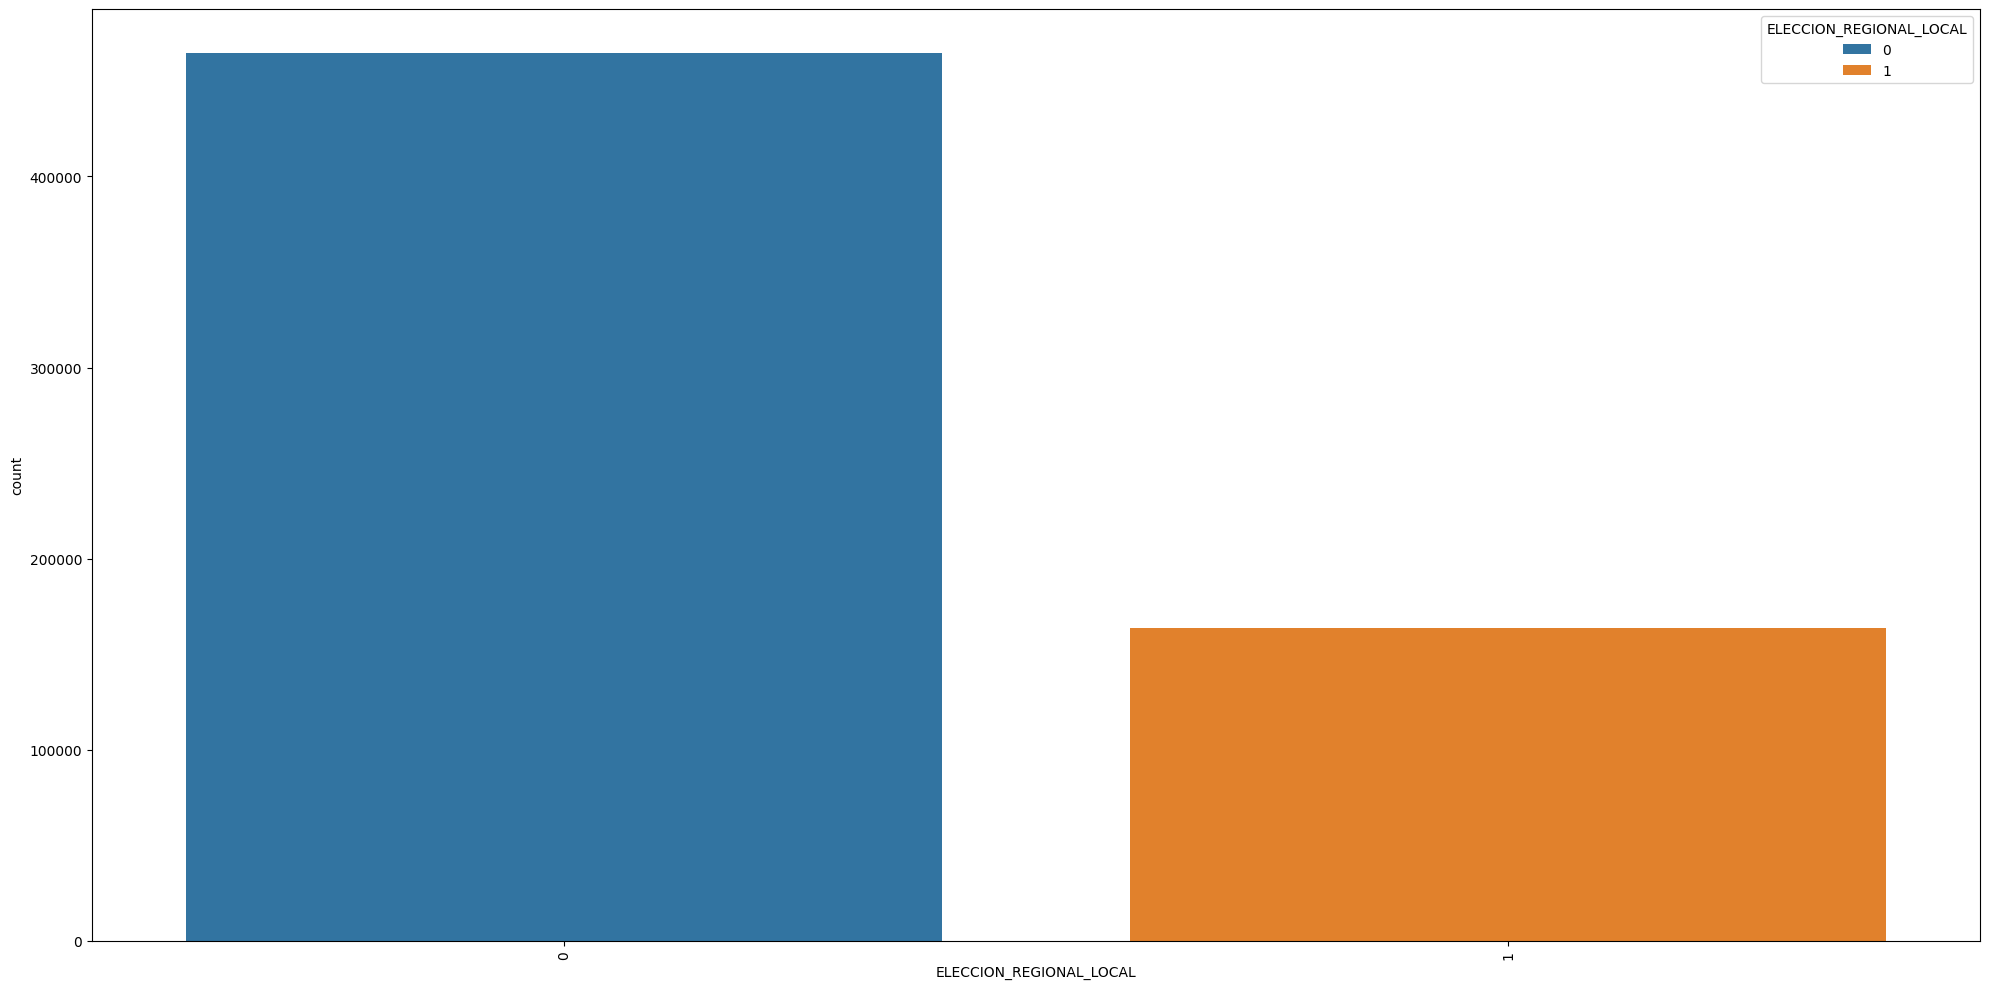

In [53]:
colores_personalizados = ['green', 'blue', 'orange']
for col in columnas_categoricas:
    fig, ax = plt.subplots(figsize=(20, 10))  # Aumentamos el ancho para estirar horizontalmente
    
    sns.countplot(
        data=df_entrada,
        x=col,
        hue=col,
        palette=sns.color_palette("tab10"),
        ax=ax
    )
    
    # Rotamos las etiquetas del eje x verticalmente
    plt.xticks(rotation=90, ha='center')
    
    # Ajustamos el diseño para que las etiquetas no se corten
    plt.tight_layout()
    
    # Mostramos el gráfico
    plt.show()

### Distribucion con la variable objetivo


In [12]:
def plot_categorical(column):
    #fig = plt.figure(figsize=(10, 5))    
    #sns.countplot(data=df_entrada, x=column, hue='CLASE')
    #plt.show()
    fig, ax = plt.subplots(figsize=(20, 10))  # Aumentamos el ancho para estirar horizontalmente

    sns.countplot(
        data=df_entrada,
        x=column,
        hue='clasificacion',
        #palette=sns.color_palette("tab10"),
        ax=ax
    )
    
    # Rotamos las etiquetas del eje x verticalmente
    plt.xticks(rotation=90, ha='center')
    
    # Ajustamos el diseño para que las etiquetas no se corten
    plt.tight_layout()
    
    # Mostramos el gráfico
    plt.show()

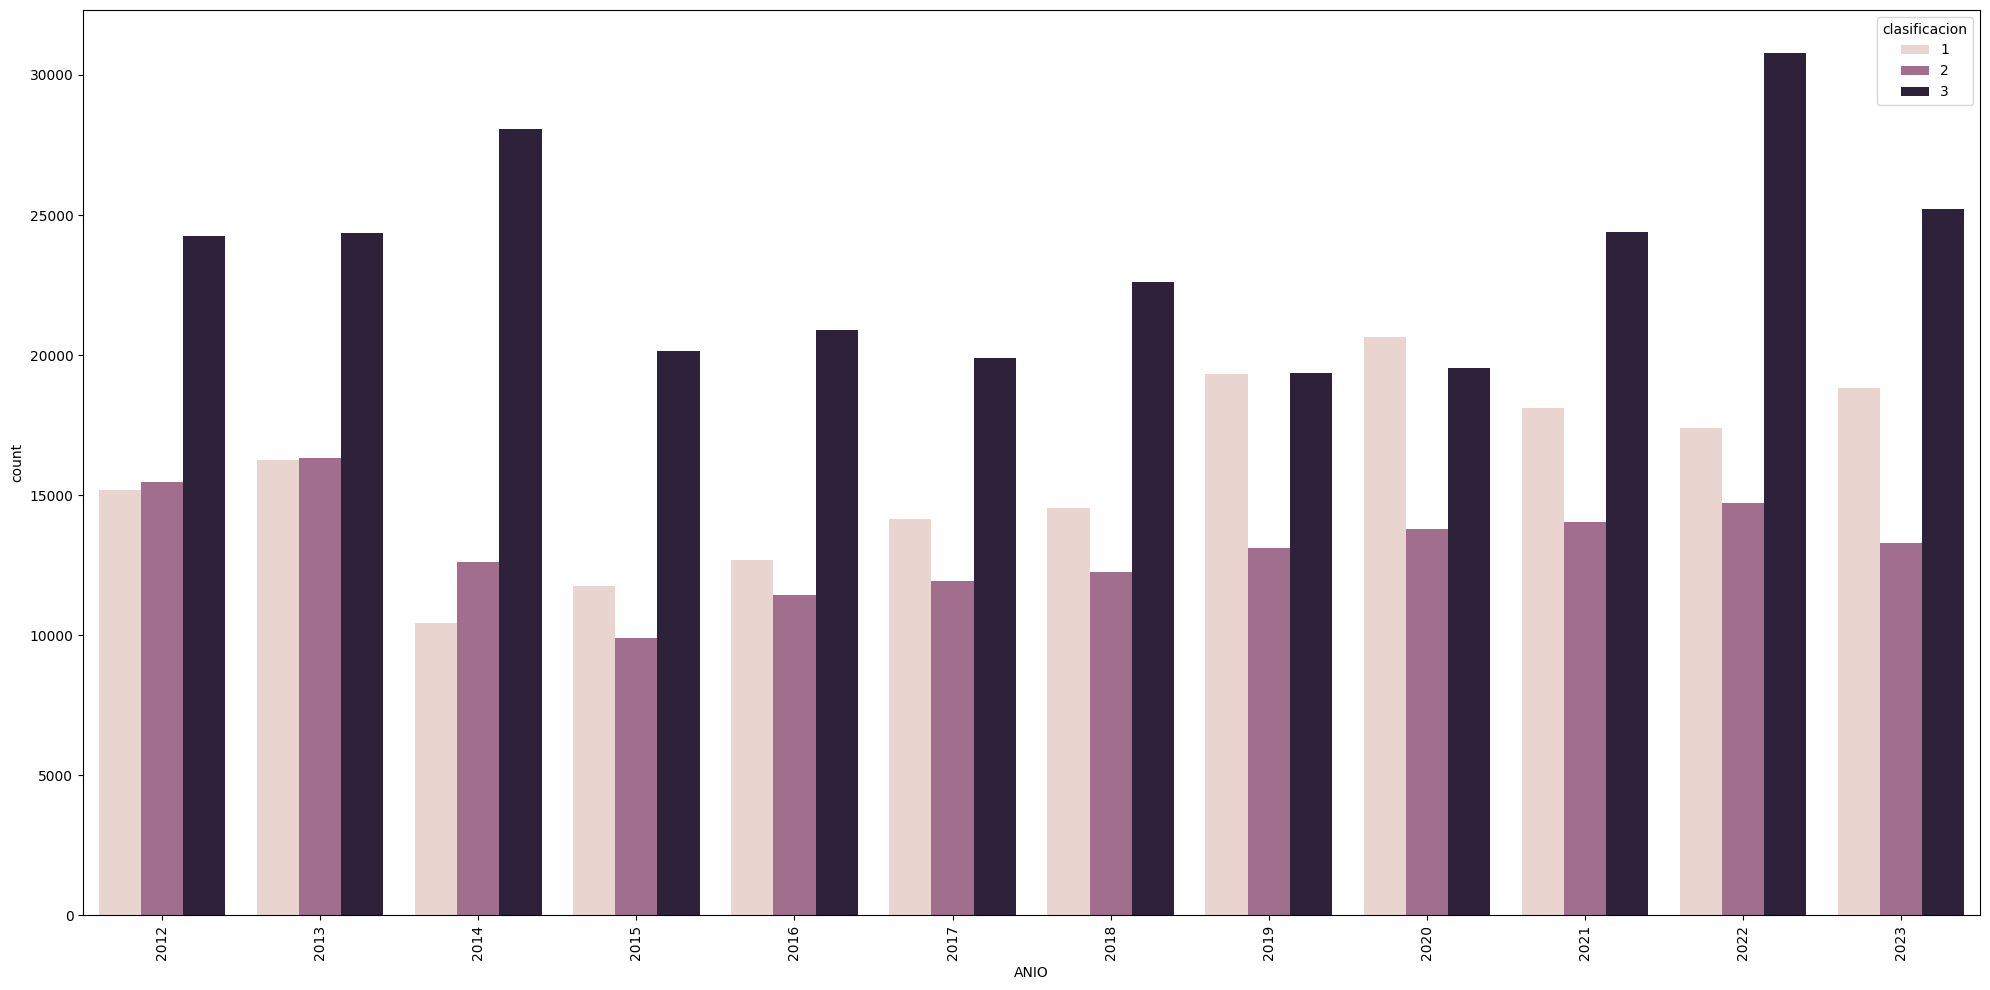

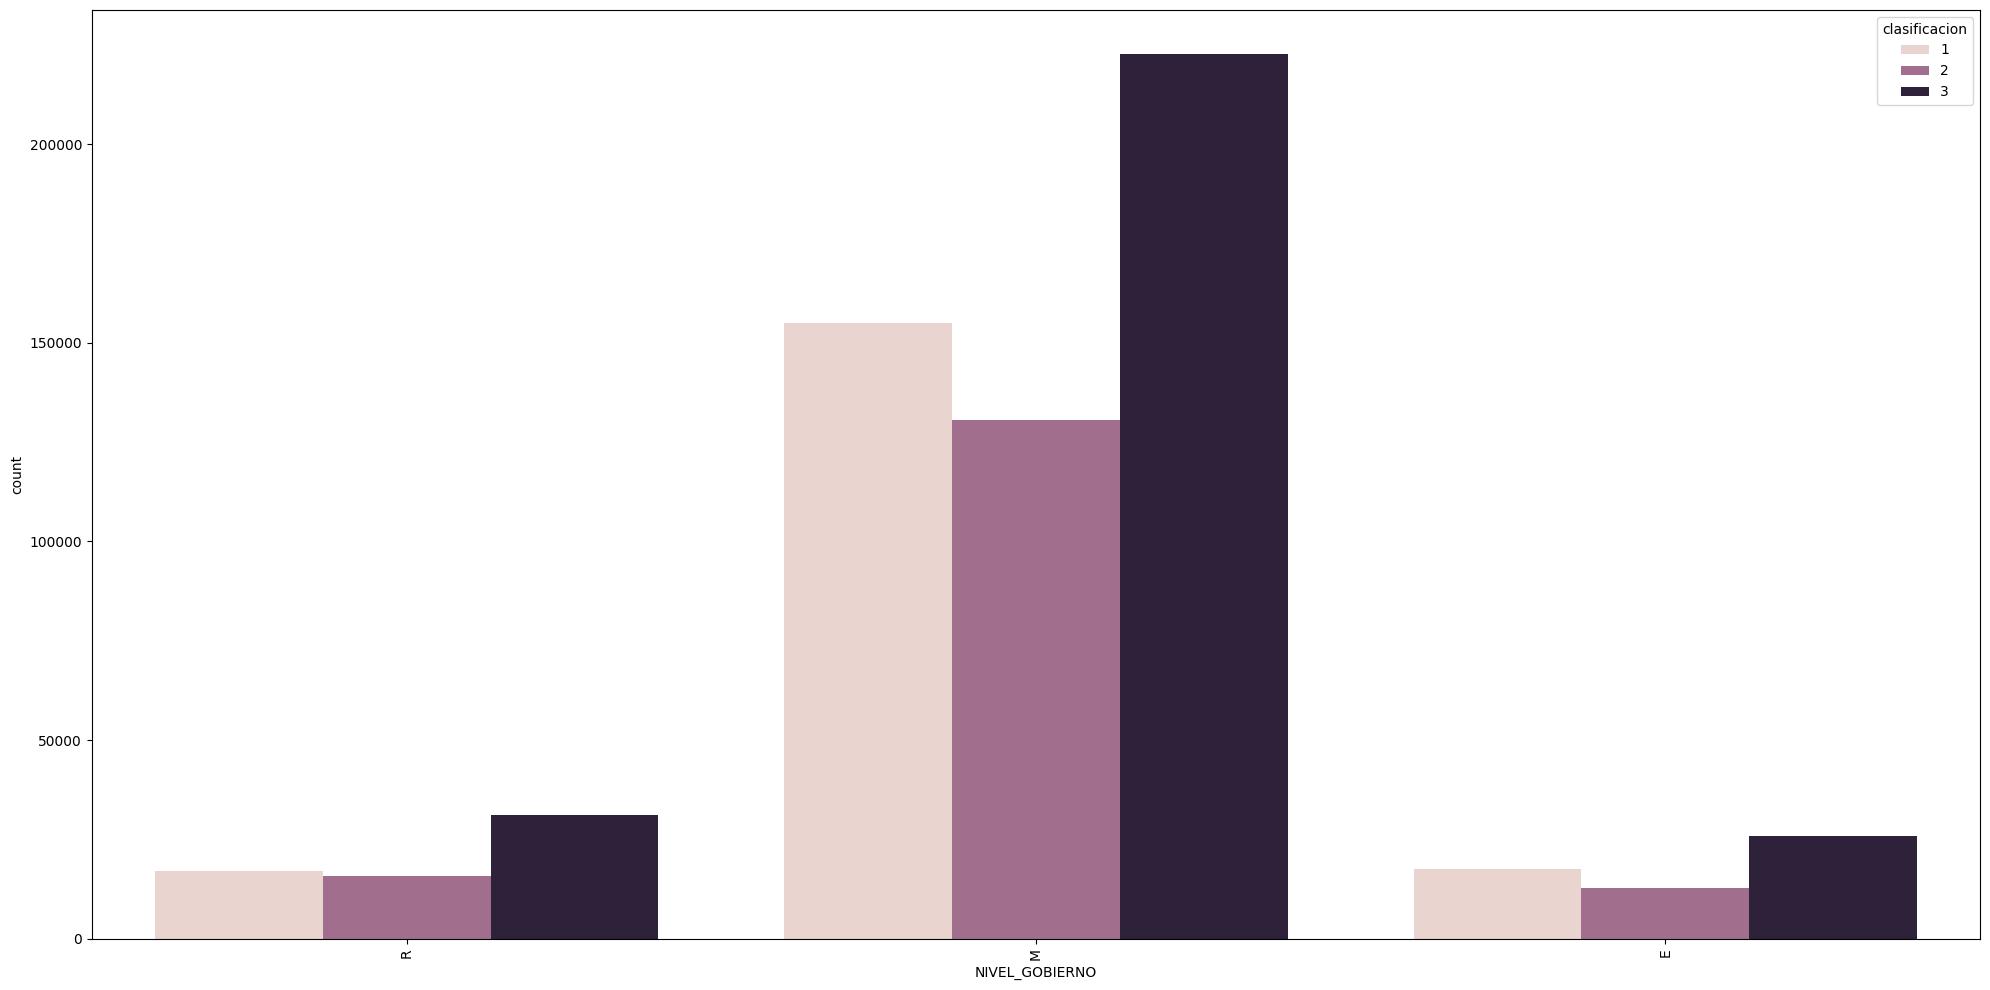

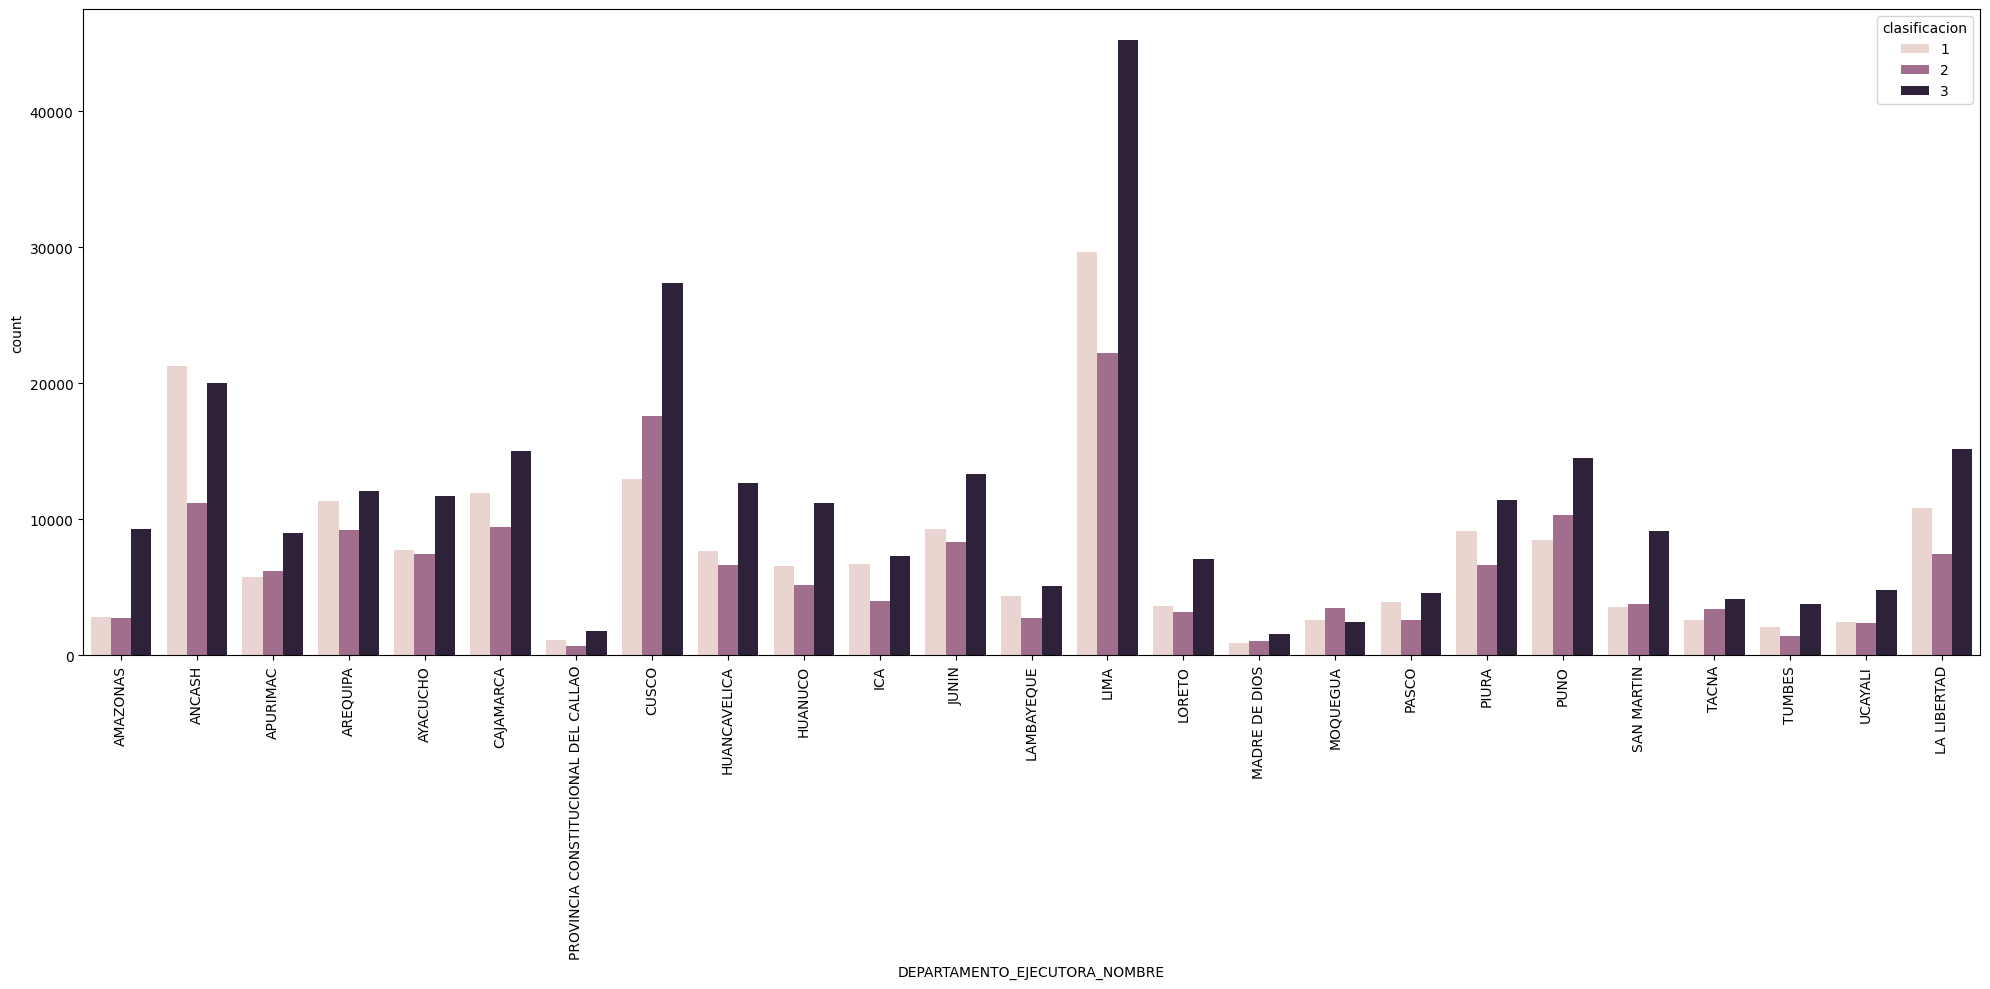

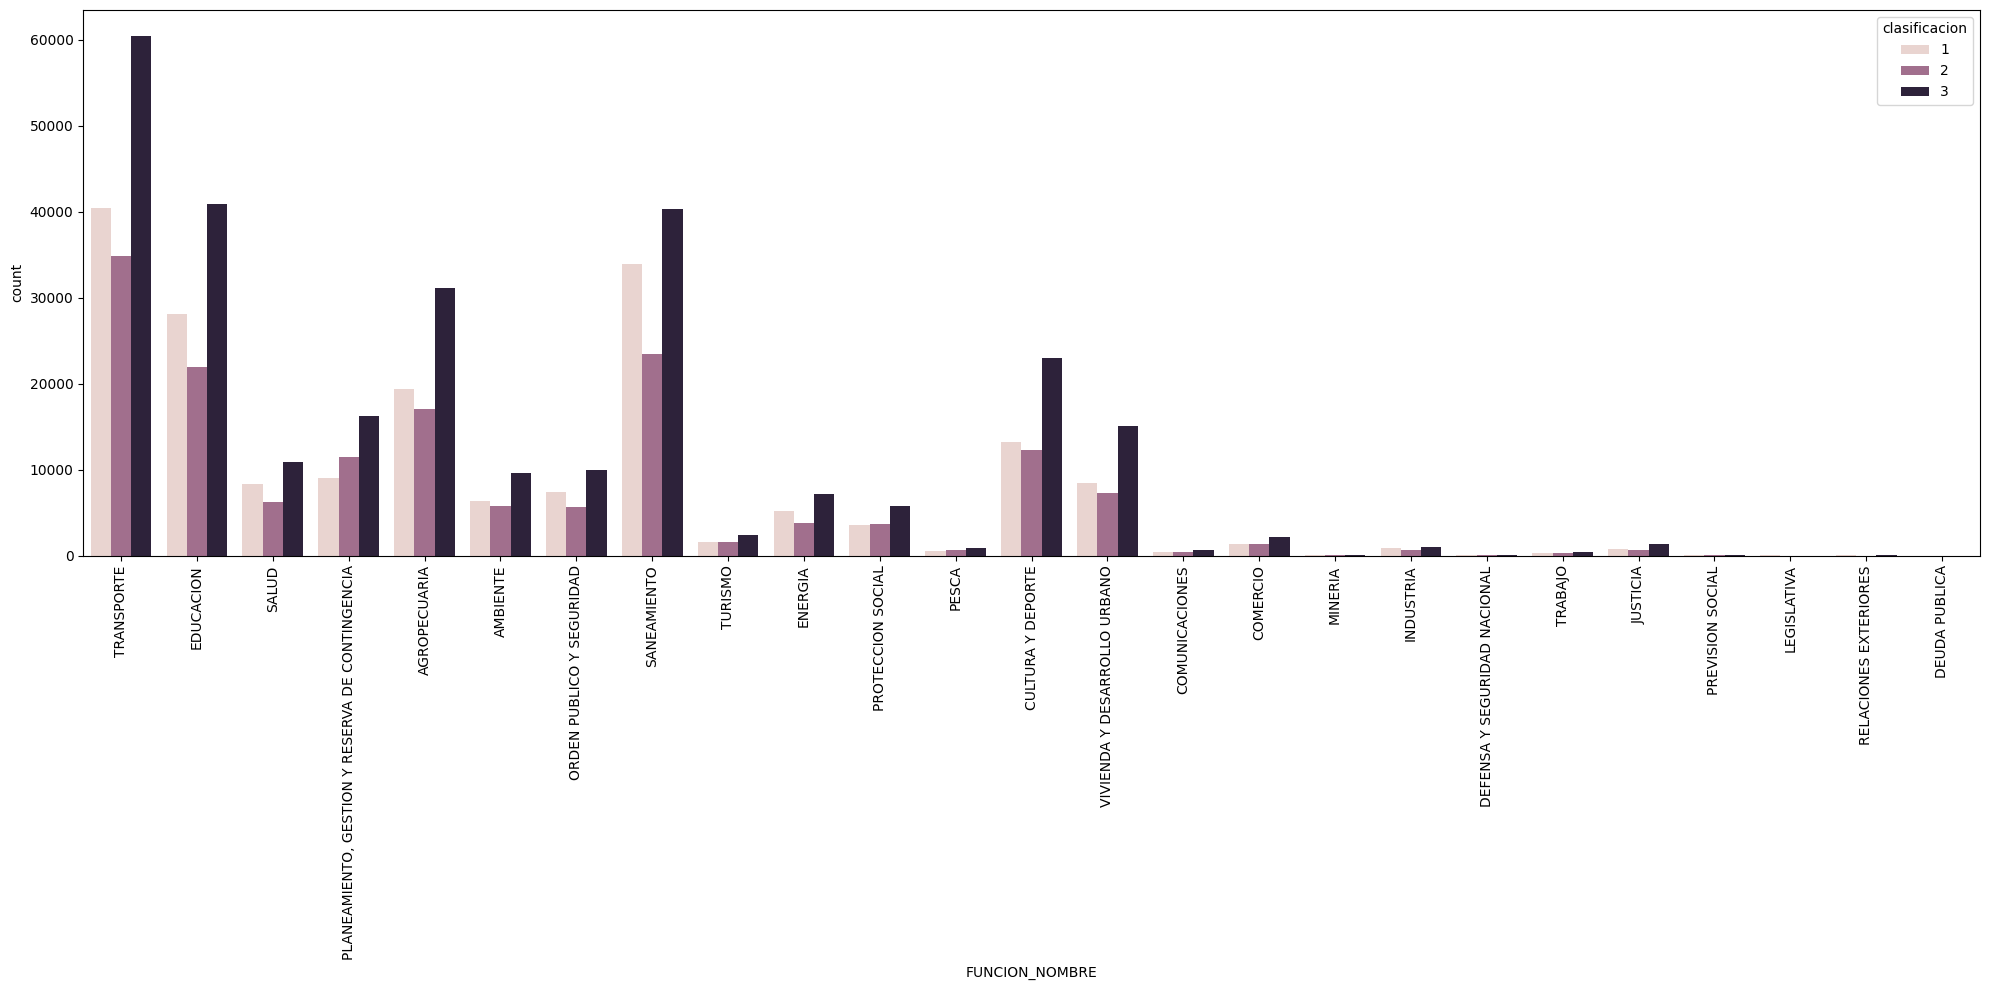

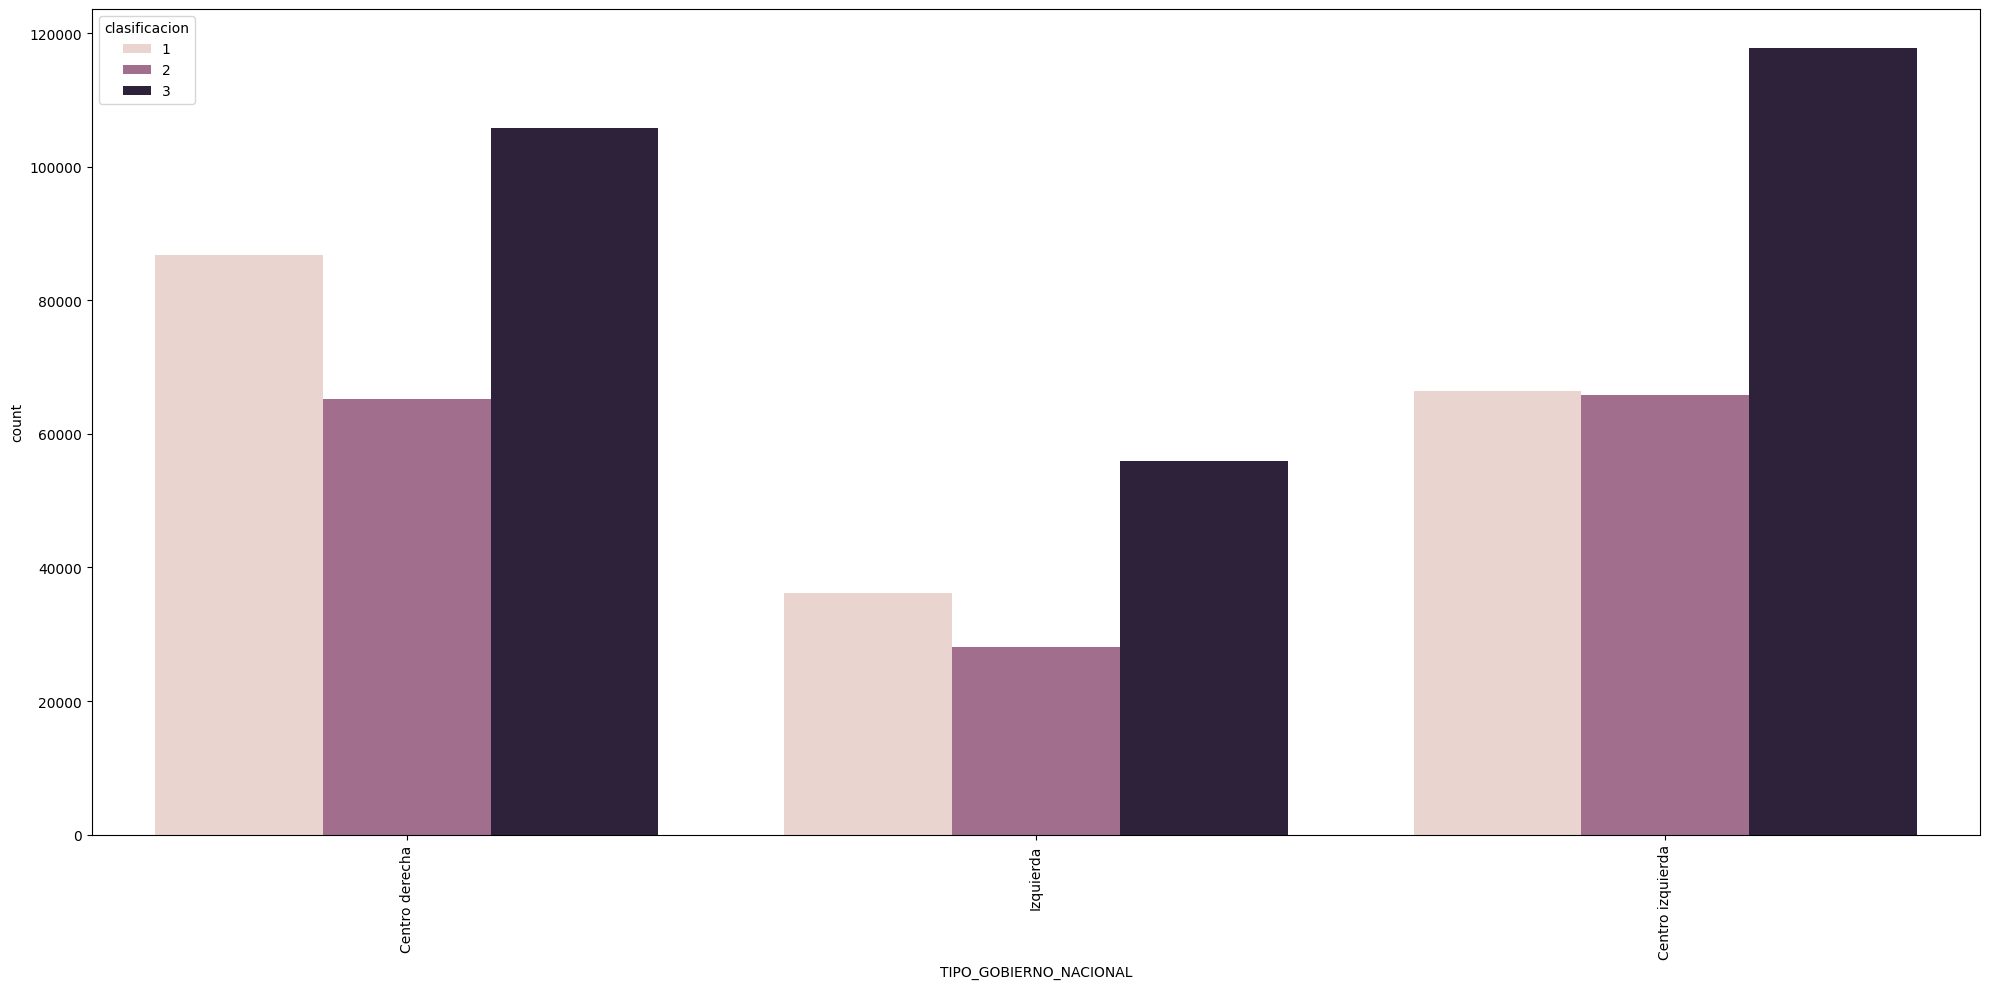

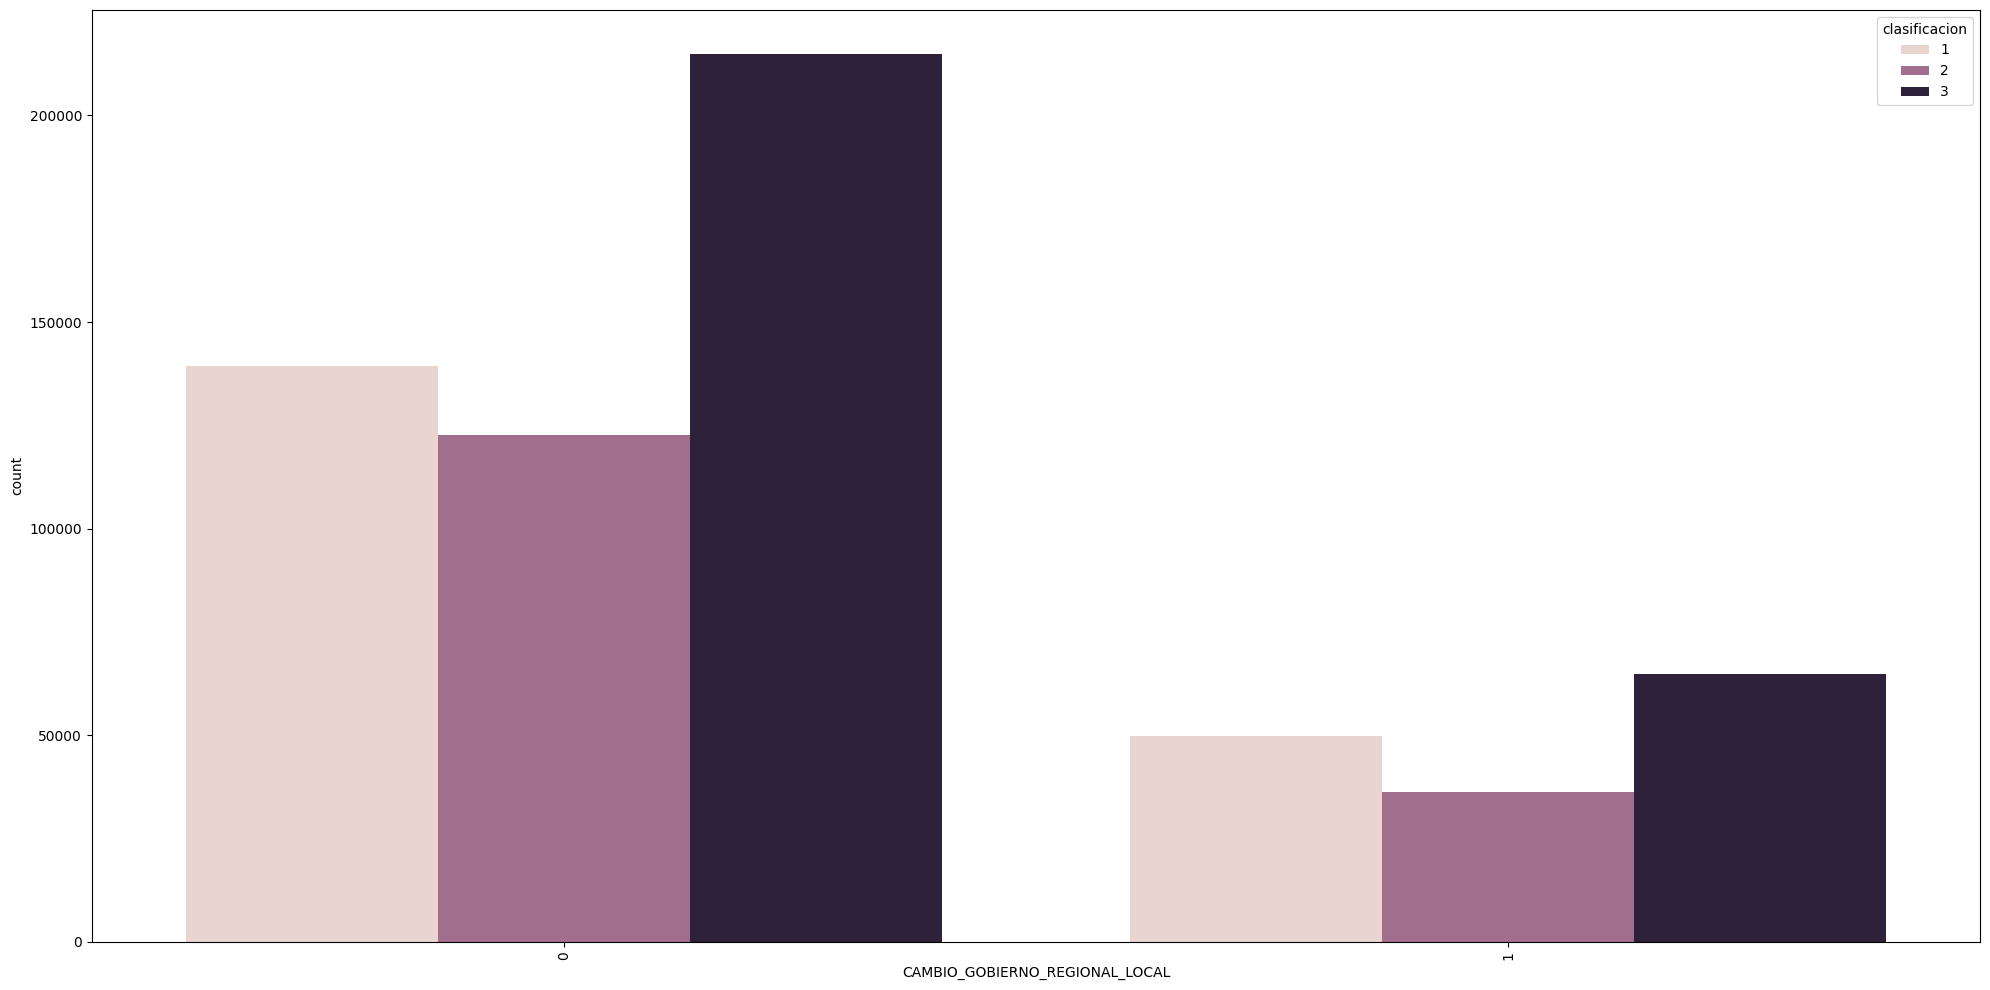

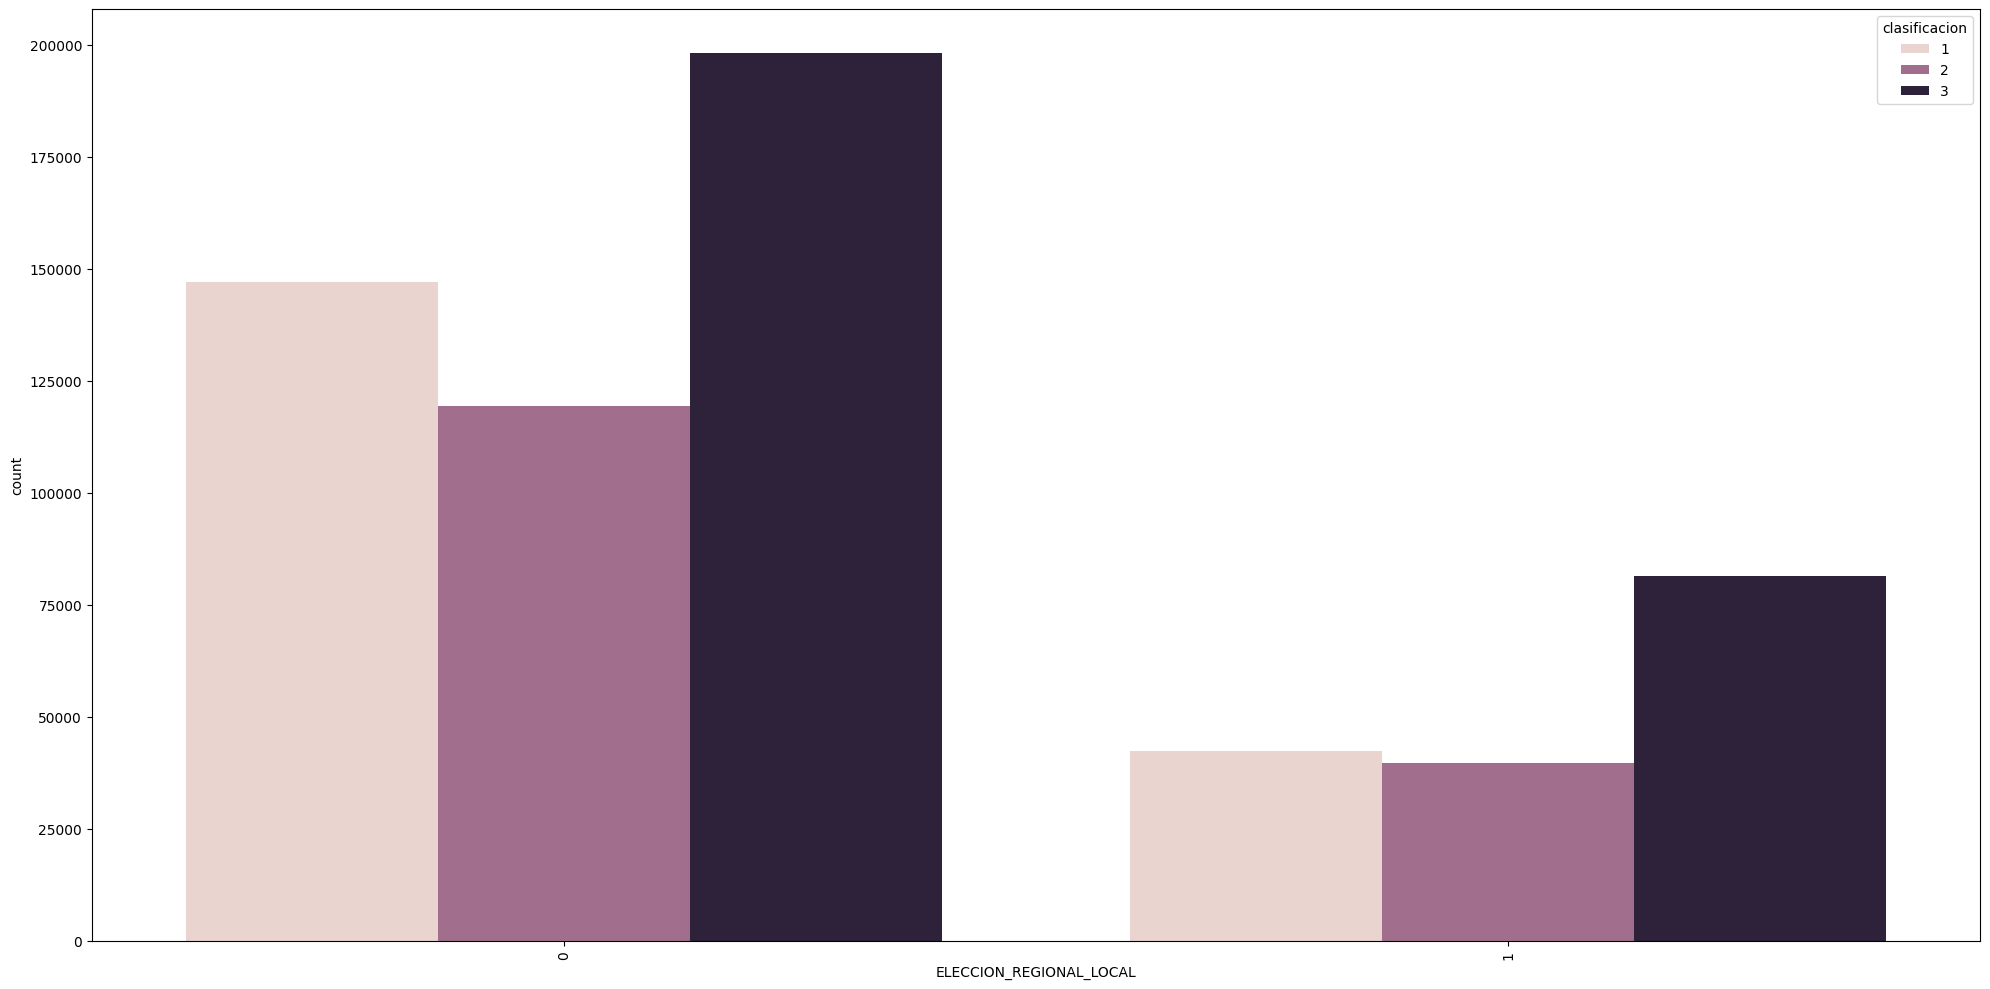

In [13]:
for col in columnas_categoricas:
    plot_categorical(col)

In [14]:
num_var = ['PIA'
        ,'PIM'
        ,'DEVENGADO'
        ,'IP'
        ,'NRO_PRESIDENTES_X_ANO'
        ,'NRO_CONFLICTO_SOCIAL_X_ANO'
        ,'INFLACION_ANUAL'
        ,'PROYECTO_EDAD_NETA'
        ,'PROYECTO_EDAD_BRUTA'
        ,'AVANCE'
        ,'CLASE']
cat_var = ['ANIO'
,'NIVEL'
,'NIVEL_GOBIERNO'
,'DPTO'
,'DEPARTAMENTO_EJECUTORA_NOMBRE'
,'FUNCION'
,'FUNCION_NOMBRE'
,'CAMBIO_GOBIERNO_NACIONAL'
,'FENOMENO_NINO'
,'PANDEMIA'
,'CAMBIO_GOBIERNO_REGIONAL_LOCAL'
,'ELECCION_REGIONAL_LOCAL'
,'TIPO_GOBIERNO_NACIONAL'
,'PROYECTO'
,'EJECUTORA'
,'CLASE']
df_entrada_num = df_entrada[num_var]
df_entrada_cat = df_entrada[cat_var]

### Agregando Ruido

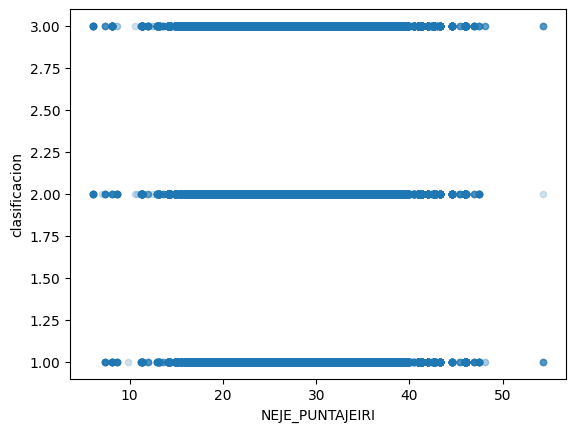

In [25]:
#df_entrada=df_entrada.query('ANIO > 2021')
df_entrada.plot.scatter(x="NEJE_PUNTAJEIRI", y="clasificacion", alpha=0.2)
plt.show()

# Classification Model : Logistic Regression

In [13]:
df_entrada = df_entrada.query('DEVENGADO >= 0')
df_entrada = df_entrada.query('PIM >= DEVENGADO')
df_entrada.info()

<class 'pandas.core.frame.DataFrame'>
Index: 627804 entries, 0 to 627869
Data columns (total 27 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   ANIO                            627804 non-null  int64  
 1   NIVEL                           627804 non-null  int64  
 2   NIVEL_GOBIERNO                  627804 non-null  object 
 3   DPTO                            627804 non-null  int64  
 4   DEPARTAMENTO_EJECUTORA_NOMBRE   627804 non-null  object 
 5   FUNCION                         627804 non-null  int64  
 6   FUNCION_NOMBRE                  627804 non-null  object 
 7   PIA                             627804 non-null  int64  
 8   PIM                             627804 non-null  int64  
 9   DEVENGADO                       627804 non-null  float64
 10  IP                              627804 non-null  float64
 11  CAMBIO_GOBIERNO_NACIONAL        627804 non-null  int64  
 12  NRO_PRESIDENTES_X_ANO

### Drop

In [47]:
col_to_drop = [ 'ANIO'
                 ,'NIVEL_GOBIERNO'
                 ,'DEPARTAMENTO_EJECUTORA_NOMBRE'
                 ,'FUNCION_NOMBRE'
                 ,'PIA'
                 ,'DEVENGADO'
                 ,'PROYECTO'
                 ,'EJECUTORA'
                 ,'AVANCE' 
                 ,
                'CLASE'
                ,
                'FENOMENO_NINO' # Borrar 
                , 'CAMBIO_GOBIERNO_NACIONAL'
                ]
               
df_entrada.drop(col_to_drop, axis='columns', inplace=True)

In [48]:
df_entrada.info()
df_entrada.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 627803 entries, 0 to 627802
Data columns (total 19 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   NIVEL                           627803 non-null  int64  
 1   DPTO                            627803 non-null  int64  
 2   FUNCION                         627803 non-null  int64  
 3   PIM                             627803 non-null  int64  
 4   IP                              627803 non-null  float64
 5   NRO_PRESIDENTES_X_ANO           627803 non-null  int64  
 6   PANDEMIA                        627803 non-null  int64  
 7   CAMBIO_GOBIERNO_REGIONAL_LOCAL  627803 non-null  int64  
 8   ELECCION_REGIONAL_LOCAL         627803 non-null  int64  
 9   TIPO_GOBIERNO_NACIONAL          627803 non-null  object 
 10  NRO_CONFLICTO_SOCIAL_X_ANO      627803 non-null  int64  
 11  INFLACION_ANUAL                 627803 non-null  float64
 12  PROYECTO_EDAD_NE

,NIVEL,DPTO,FUNCION,PIM,IP,NRO_PRESIDENTES_X_ANO,PANDEMIA,CAMBIO_GOBIERNO_REGIONAL_LOCAL,ELECCION_REGIONAL_LOCAL,TIPO_GOBIERNO_NACIONAL,NRO_CONFLICTO_SOCIAL_X_ANO,INFLACION_ANUAL,PROYECTO_EDAD_NETA,PROYECTO_EDAD_BRUTA,IGEIP_EJECUCION,P_INCO_AVG,NEJE_PUNTAJEIRI,NRO_EJECUTORAS_X_PROYECTO,clasificacion
0,2,1,15,79983,34.9,1,0,0,0,Centro derecha,169,1.36,6,8,0.629,51.47,36.305761,1,3
1,2,1,15,57539,25.8,1,1,1,0,Izquierda,215,5.60,6,8,0.629,51.47,36.305761,1,3
2,2,1,15,160000,39.7,2,0,0,0,Centro izquierda,212,3.23,6,8,0.629,51.47,36.305761,1,3
3,2,1,15,41528,36.1,3,1,0,0,Centro derecha,197,1.97,6,8,0.629,51.47,36.305761,1,3
4,2,1,15,914962,30.5,1,0,1,0,Centro derecha,184,1.90,6,8,0.629,51.47,36.305761,1,2


In [54]:
df_entrada.clasificacion.value_counts()

clasificacion
3    279507
1    189347
2    158949
Name: count, dtype: int64

### ONE HOT

In [49]:
# Aplicar one-hot encoding a 'columna1'
columns_to_one_hot_encode = ['NIVEL', 'TIPO_GOBIERNO_NACIONAL', 'DPTO', 'FUNCION']
df_one_hot = pd.get_dummies(df_entrada, columns=columns_to_one_hot_encode, dtype=int)

In [50]:
df_one_hot.iloc[:, 10:20].head()

,IGEIP_EJECUCION,P_INCO_AVG,NEJE_PUNTAJEIRI,NRO_EJECUTORAS_X_PROYECTO,clasificacion,NIVEL_1,NIVEL_2,NIVEL_3,TIPO_GOBIERNO_NACIONAL_Centro derecha,TIPO_GOBIERNO_NACIONAL_Centro izquierda
0,0.629,51.47,36.305761,1,3,0,1,0,1,0
1,0.629,51.47,36.305761,1,3,0,1,0,0,0
2,0.629,51.47,36.305761,1,3,0,1,0,0,1
3,0.629,51.47,36.305761,1,3,0,1,0,1,0
4,0.629,51.47,36.305761,1,2,0,1,0,1,0


### Renombrar

In [51]:
(
    df_one_hot.rename(columns={'TIPO_GOBIERNO_NACIONAL_Centro derecha': 'tgn_centro_derecha',
                                'TIPO_GOBIERNO_NACIONAL_Centro izquierda': 'tgn_centro_izquierda',
                                'TIPO_GOBIERNO_NACIONAL_Izquierda': 'tgn_izquierda',
                                        }, inplace=True)
)

In [55]:
df_one_hot.clasificacion.value_counts()

clasificacion
3    279507
1    189347
2    158949
Name: count, dtype: int64

In [59]:
df_one_hot['clasificacion'] = df_one_hot['clasificacion'].astype(int).astype('category')

### NORMALIZACION

In [60]:
from sklearn.preprocessing import MinMaxScaler

In [61]:
scaler = MinMaxScaler()
df_one_hot_scaled = scaler.fit_transform(df_one_hot)
#df_one_hot_scaled = pd.DataFrame(scaler.fit_transform(df_one_hot), columns=df_one_hot.columns)
df_one_hot_scaled = pd.DataFrame(df_one_hot_scaled, columns=df_one_hot.columns)
df_one_hot_scaled.head(4)

,PIM,IP,NRO_PRESIDENTES_X_ANO,PANDEMIA,CAMBIO_GOBIERNO_REGIONAL_LOCAL,ELECCION_REGIONAL_LOCAL,NRO_CONFLICTO_SOCIAL_X_ANO,INFLACION_ANUAL,PROYECTO_EDAD_NETA,PROYECTO_EDAD_BRUTA,...,FUNCION_16,FUNCION_17,FUNCION_18,FUNCION_19,FUNCION_20,FUNCION_21,FUNCION_22,FUNCION_23,FUNCION_24,FUNCION_25
0,0.000043,0.612053,0.0,0.0,0.0,0.0,0.147541,0.000000,0.454545,0.636364,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.000031,0.440678,0.0,1.0,1.0,0.0,0.901639,0.588889,0.454545,0.636364,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.000086,0.702448,0.5,0.0,0.0,0.0,0.852459,0.259722,0.454545,0.636364,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.000022,0.634652,1.0,1.0,0.0,0.0,0.606557,0.084722,0.454545,0.636364,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [64]:
df_one_hot_scaled.clasificacion.value_counts()

clasificacion
1.0    279507
0.0    189347
0.5    158949
Name: count, dtype: int64

In [65]:
X = df_one_hot.drop(['clasificacion'], axis=1)
y = df_one_hot['clasificacion'].values

In [66]:
y.value_counts()

1    189347
2    158949
3    279507
Name: count, dtype: int64

### Scaling

In [67]:
from sklearn.preprocessing import RobustScaler

In [68]:
# Crear el objeto RobustScaler
scaler = RobustScaler()

# Ajustar el scaler a los datos de entrenamiento y transformar
X_train_scaled = scaler.fit_transform(X_train)

# Transformar los datos de prueba
X_test_scaled = scaler.transform(X_test)

## ENTRENAMIENTO DEL MODELO DE CLASIFICACION

In [33]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split

(X_train, X_test, y_train, y_test) = train_test_split(X, y, test_size=0.3, random_state=42)

In [41]:
X_train.head(5)

,PIM,IP,NRO_PRESIDENTES_X_ANO,PANDEMIA,CAMBIO_GOBIERNO_REGIONAL_LOCAL,ELECCION_REGIONAL_LOCAL,NRO_CONFLICTO_SOCIAL_X_ANO,INFLACION_ANUAL,PROYECTO_EDAD_NETA,PROYECTO_EDAD_BRUTA,...,FUNCION_16,FUNCION_17,FUNCION_18,FUNCION_19,FUNCION_20,FUNCION_21,FUNCION_22,FUNCION_23,FUNCION_24,FUNCION_25
233047,0.000062,0.011299,0.5,0.0,0.0,0.0,0.852459,0.259722,0.181818,0.181818,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
421740,0.000062,0.828625,1.0,1.0,0.0,0.0,0.606557,0.084722,0.000000,0.000000,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
166951,0.000963,0.346516,0.0,0.0,1.0,0.0,0.836066,0.422222,0.363636,0.818182,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
17785,0.000016,0.470810,0.0,0.0,0.0,0.0,0.065574,0.179167,0.636364,0.909091,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
414405,0.000066,0.516008,1.0,1.0,0.0,0.0,0.606557,0.084722,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [48]:
y_train

array([1., 1., 0., ..., 1., 1., 1.])

In [38]:
# Crear y entrenar el modelo
model = LogisticRegression(multi_class='ovr', random_state=42)
model.fit(X_train, y_train)


ValueError: Unknown label type: continuous. Maybe you are trying to fit a classifier, which expects discrete classes on a regression target with continuous values.

In [99]:
from sklearn.metrics import accuracy_score
prediction_test = model.predict(X_test)
print(accuracy_score(y_test, prediction_test))

0.6071163116651447


## Evaluacion del modelo

In [100]:
model.predict_proba(X_test)

array([[0.36465068, 0.63534932],
       [0.4008963 , 0.5991037 ],
       [0.39096645, 0.60903355],
       ...,
       [0.43016748, 0.56983252],
       [0.6414999 , 0.3585001 ],
       [0.47570563, 0.52429437]])

Axes(0.125,0.11;0.775x0.77)


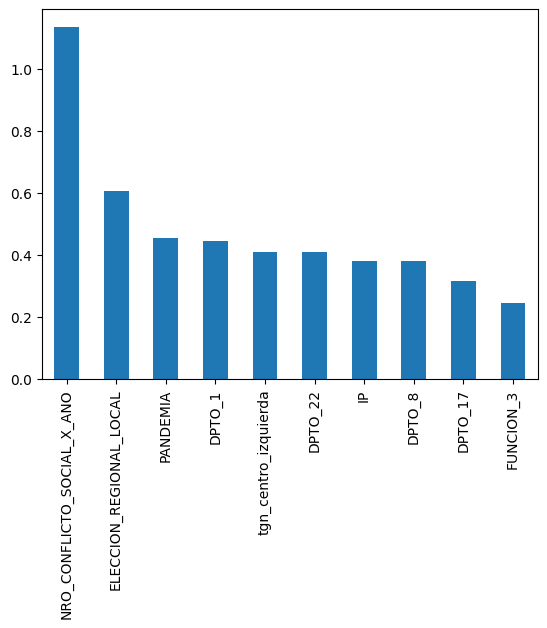

In [101]:
weights = pd.Series(model.coef_[0], index=X.columns.values)
print(weights.sort_values(ascending=False)[:10].plot(kind='bar'))

Axes(0.125,0.11;0.775x0.77)


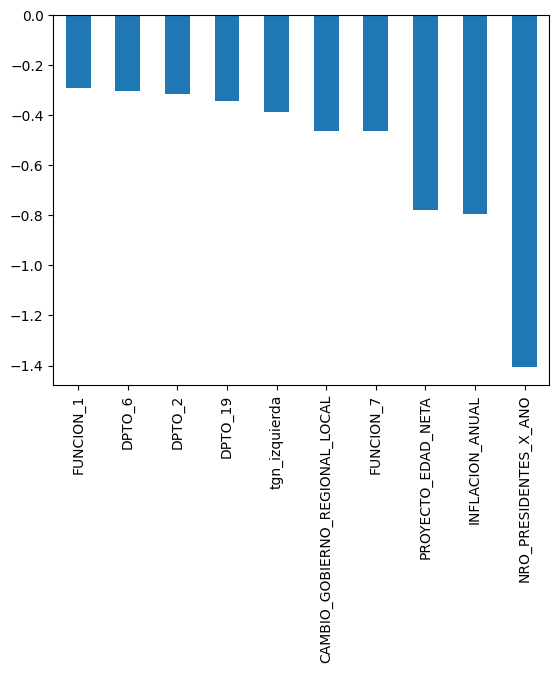

In [102]:
print(weights.sort_values(ascending=False)[-10:].plot(kind='bar'))

## SVM

In [2]:
from sklearn.svm import SVC

In [3]:
# 2. Crear y entrenar el modelo SVM
svm_model = SVC(kernel='linear', random_state=42)  # Puedes ajustar el kernel y otros parámetros según sea necesario
svm_model.fit(X_train, y_train)

# 3. Hacer predicciones en el conjunto de prueba
y_pred = svm_model.predict(X_test)

# 4. Evaluar el modelo
print("Matriz de Confusión:")
print(confusion_matrix(y_test, y_pred))
print("\nInforme de Clasificación:")
print(classification_report(y_test, y_pred))

# 5. Calcular la precisión del modelo
accuracy = svm_model.score(X_test, y_test)
print(f"\nPrecisión del modelo: {accuracy:.2f}")

NameError: name 'X_train' is not defined

In [49]:
y_train

array([1., 1., 0., ..., 1., 1., 1.])

## Random Forest

In [34]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import RandomizedSearchCV
from time import time
# 2. Función para entrenar y evaluar modelos
def train_and_evaluate(model, X_train, X_test, y_train, y_test):
    start_time = time()
    model.fit(X_train, y_train)
    train_time = time() - start_time
    
    start_time = time()
    y_pred = model.predict(X_test)
    predict_time = time() - start_time
    
    accuracy = accuracy_score(y_test, y_pred)
    
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Training time: {train_time:.2f} seconds")
    print(f"Prediction time: {predict_time:.2f} seconds")
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))
    print("\nConfusion Matrix:")
    print(confusion_matrix(y_test, y_pred))

In [35]:
from sklearn.ensemble import RandomForestClassifier

# 4. Random Forest
print("\nTraining Random Forest model...")
rf_model = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
train_and_evaluate(rf_model, X_train, X_test, y_train, y_test)


Training Random Forest model...


ValueError: Unknown label type: continuous. Maybe you are trying to fit a classifier, which expects discrete classes on a regression target with continuous values.

In [22]:

# 5. Optimización de hiperparámetros para Random Forest
print("\nOptimizing Random Forest hyperparameters...")
param_dist = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

rf_random = RandomizedSearchCV(estimator=RandomForestClassifier(random_state=42),
                               param_distributions=param_dist,
                               n_iter=10, cv=3, verbose=2, random_state=42, n_jobs=-1)

rf_random.fit(X_train, y_train)

print("Best parameters:", rf_random.best_params_)
print("\nEvaluating optimized Random Forest model...")
train_and_evaluate(rf_random.best_estimator_, X_train, X_test, y_train, y_test)


Optimizing Random Forest hyperparameters...
Fitting 3 folds for each of 20 candidates, totalling 60 fits


c:\DATA\scm\github\mia\MIA104\.venv\lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
26 fits failed out of a total of 60.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
3 fits failed with the following error:
Traceback (most recent call last):
  File "c:\DATA\scm\github\mia\MIA104\.venv\lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\DATA\scm\github\mia\MIA104\.venv\lib\site-packages\sklearn\base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "c:\DATA\scm\github\mia\MIA104\.venv\lib\site-packages\sklearn\ensemble\_forest.py", line 489, in fit
    trees = Parallel(
  File

Best parameters: {'n_estimators': 200, 'min_samples_split': 10, 'min_samples_leaf': 4, 'max_depth': 30}

Evaluating optimized Random Forest model...
Accuracy: 0.6657
Training time: 149.51 seconds
Prediction time: 8.98 seconds

Classification Report:
              precision    recall  f1-score   support

         0.0       0.63      0.46      0.53     77683
         1.0       0.68      0.81      0.74    110673

    accuracy                           0.67    188356
   macro avg       0.66      0.64      0.64    188356
weighted avg       0.66      0.67      0.65    188356


Confusion Matrix:
[[35759 41924]
 [21043 89630]]


## SVM

In [23]:
# 3. SVM
print("Training SVM model...")
svm_model = SVC(kernel='linear', random_state=42)
train_and_evaluate(svm_model, X_train, X_test, y_train, y_test)

Training SVM model...
Accuracy: 0.5884
Training time: 93174.63 seconds
Prediction time: 2910.32 seconds

Classification Report:
              precision    recall  f1-score   support

         0.0       0.50      0.11      0.17     77683
         1.0       0.60      0.93      0.73    110673

    accuracy                           0.59    188356
   macro avg       0.55      0.52      0.45    188356
weighted avg       0.56      0.59      0.50    188356


Confusion Matrix:
[[  8212  69471]
 [  8059 102614]]


# Regression Models

## Linear Regression

In [67]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold, cross_val_score
from sklearn import metrics

In [68]:
%matplotlib inline

CV = []
R2_train = []
R2_test = []
MAE_train = []
MAE_test = []

    
def modeling(x, y, k,test_size):
    """ fit model, print result, perform cross validation, draw plots for model"""
    
    # train_test_split
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=test_size, random_state=0)
    
    # fit model
    model = LinearRegression()
    model.fit(x_train, y_train)

    # R2 Score of train set:
    y_pred_train = model.predict(x_train)
    r2_train_model = metrics.r2_score(y_train, y_pred_train)
    # MAE and MSE of train set:
    mae_train_model = metrics.mean_absolute_error(y_train, y_pred_train)

    # R2 Score of test set:
    y_pred_test = model.predict(x_test)
    r2_test_model = metrics.r2_score(y_test, y_pred_test)
    # MAE and MSE of train set:
    mae_test_model = metrics.mean_absolute_error(y_test, y_pred_test)
    mse_test_model = metrics.mean_squared_error(y_test, y_pred_test)


    # R2 mean of train set using Cross validation:
    kf = KFold(k)
    cross_val = cross_val_score(model, x_train, y_train, cv=kf, scoring='r2')
    cv_mean = np.mean(cross_val)

    
    # Printing results
    print('='*30,'Shape','='*30)
    print("x train: ",x_train.shape)
    print("x test: ",x_test.shape)
    print("y train: ",y_train.shape)
    print("y test: ",y_test.shape)
    print('='*30,'R2_score and CV','='*30)
    print("Train R2-score :", round(r2_train_model, 3))
    print("Test R2-score :", round(r2_test_model, 3))
    print("Train MAE :", round(mae_train_model, 3))
    print("Test MAE :", round(mae_test_model, 3))
    print("Train CV scores :", cross_val)
    print("Train CV mean :", round(cv_mean, 3))

    # append_result:
    R2_train.append(round(r2_train_model, 3))
    MAE_train.append(round(mae_train_model, 3))
    R2_test.append(round(r2_test_model, 3))
    MAE_test.append(round(mae_test_model, 3))
    CV.append(round(cv_mean, 3))

    # Plotting Graphs 
    # Residual Plot of train data
    fig, ax = plt.subplots(1,3,figsize = (15,4))
    ax[0].set_title('Residual Plot of Train samples', fontsize=14, fontweight='bold')
    sns.histplot((y_train-y_pred_train), kde=True, ax = ax[0])
    ax[0].set_xlabel('y_train - y_pred_train')
    # Y_test vs Y_pred_test scatter plot
    ax[1].set_title('y_test vs y_pred_test', fontsize=14, fontweight='bold')
    ax[1].scatter(x = y_test, y = y_pred_test)
    ax[1].set_xlabel('y_test')
    ax[1].set_ylabel('y_pred_test')
    # MAE_test vs MAE_train line plot
    ax[2].set_title('MAE test vs MAE train', fontsize=14, fontweight='bold')
    sns.lineplot(data=pd.DataFrame({'MAE_train': MAE_train, 'MAE_test': MAE_test}), markers=True)
    ax[2].set_xlabel('M')
    ax[2].set_ylabel('MAE')

    plt.show()

    # Print results of model again
    print("Train R2-score :", round(r2_train_model, 3))
    print("Test R2-score :", round(r2_test_model, 3))
    
    # The parameters for linear regression model
    parameter = ['b']+ ['w_' + str(i) for i in range(1,x.shape[1]+1)]
    columns = ['intercept'] + x.columns.to_list()
    weight_table = pd.DataFrame({'Parameter': parameter, 'Columns': columns})
    sk_weight = [i for i in model.intercept_] + model.coef_.tolist()[0]
    weight_table = weight_table.join(pd.Series(sk_weight, name='Sk_weight'))
    return weight_table

In [69]:
df_one_hot_scaled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 627853 entries, 0 to 627852
Data columns (total 22 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   DPTO                            627853 non-null  float64
 1   FUNCION                         627853 non-null  float64
 2   PIM                             627853 non-null  float64
 3   IP                              627853 non-null  float64
 4   CAMBIO_GOBIERNO_NACIONAL        627853 non-null  float64
 5   NRO_PRESIDENTES_X_ANO           627853 non-null  float64
 6   FENOMENO_NINO                   627853 non-null  float64
 7   PANDEMIA                        627853 non-null  float64
 8   CAMBIO_GOBIERNO_REGIONAL_LOCAL  627853 non-null  float64
 9   ELECCION_REGIONAL_LOCAL         627853 non-null  float64
 10  NRO_CONFLICTO_SOCIAL_X_ANO      627853 non-null  float64
 11  INFLACION_ANUAL                 627853 non-null  float64
 12  EJECUTORA       

In [70]:
# create 1st model by all feature by 1 dimension
norm1 = df_one_hot_scaled.copy()
x = norm1.drop('AVANCE', axis='columns')
y = norm1.AVANCE.values.reshape(-1,1)

KeyError: "['AVANCE'] not found in axis"

In [20]:
x.drop('CLASE', axis=1, inplace=True)

In [21]:
x.drop('PIA', axis=1, inplace=True)      
x.info()

KeyError: "['PIA'] not found in axis"

============================== Shape ==============================
x train:  (502282, 68)
x test:  (125571, 68)
y train:  (502282, 1)
y test:  (125571, 1)
============================== R2_score and CV ==============================
Train R2-score : 0.043
Test R2-score : 0.045
Train MAE : 0.087
Test MAE : 0.087
Train CV scores : [0.04179483 0.04257954 0.0426304  0.0432516  0.04504214 0.04075865
 0.04298101 0.04079194 0.04478307 0.04397187]
Train CV mean : 0.043


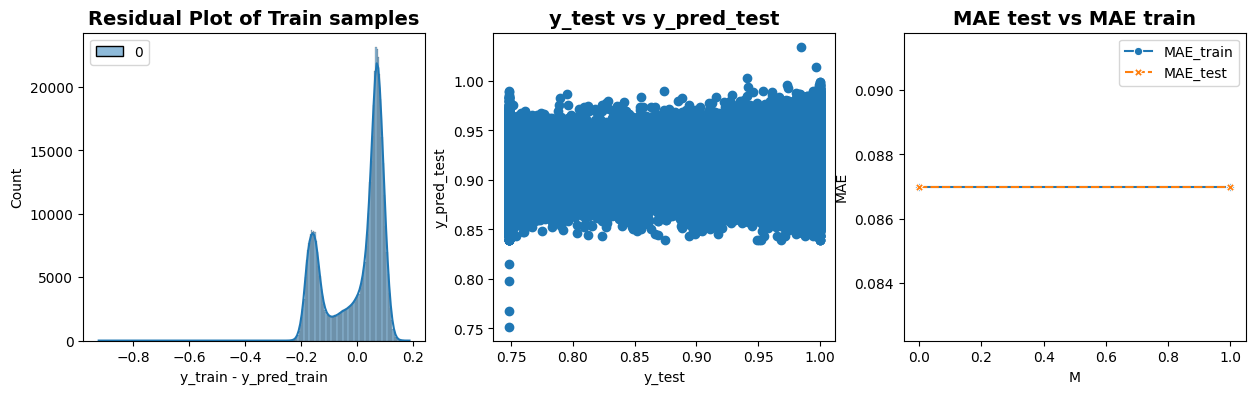

Train R2-score : 0.043
Test R2-score : 0.045


,Parameter,Columns,Sk_weight
0,b,intercept,-2.574804e+10
1,w_1,PIM,2.619595e-01
2,w_2,IP,1.576570e-02
3,w_3,CAMBIO_GOBIERNO_NACIONAL,3.344929e-03
4,w_4,NRO_PRESIDENTES_X_ANO,-6.236574e-02
...,...,...,...
64,w_64,FUNCION_21,-1.172791e+10
65,w_65,FUNCION_22,-1.172791e+10
66,w_66,FUNCION_23,-1.172791e+10
67,w_67,FUNCION_24,-1.172791e+10


In [57]:
modeling(x, y, 10, 0.2)

## CLASIFICACION CON EJECUTORA

In [53]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 439497 entries, 317047 to 121958
Data columns (total 69 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   PIM                             439497 non-null  float64
 1   IP                              439497 non-null  float64
 2   CAMBIO_GOBIERNO_NACIONAL        439497 non-null  float64
 3   NRO_PRESIDENTES_X_ANO           439497 non-null  float64
 4   FENOMENO_NINO                   439497 non-null  float64
 5   PANDEMIA                        439497 non-null  float64
 6   CAMBIO_GOBIERNO_REGIONAL_LOCAL  439497 non-null  float64
 7   ELECCION_REGIONAL_LOCAL         439497 non-null  float64
 8   NRO_CONFLICTO_SOCIAL_X_ANO      439497 non-null  float64
 9   INFLACION_ANUAL                 439497 non-null  float64
 10  EJECUTORA                       439497 non-null  float64
 11  PROYECTO_EDAD_NETA              439497 non-null  float64
 12  PROYECTO_EDAD_BR

In [66]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
result = model.fit(X_train, y_train)

In [65]:
from sklearn.metrics import accuracy_score
prediction_test = model.predict(X_test)
print(accuracy_score(y_test, prediction_test))

0.5947567372422434


## 3 CLASES

In [36]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Cargar el dataset
# Asegúrate de reemplazar 'ruta_del_archivo.csv' con la ruta real de tu archivo
# df = pd.read_csv('ruta_del_archivo.csv')

# Preparar los datos
X = df_one_hot_scaled.drop(columns=['clasificacion'])
# Asegurarse de que 'clasificacion' sea una variable categórica
df_one_hot_scaled['clasificacion'] = df_one_hot_scaled['clasificacion'].astype(int).astype('category')



In [37]:
y = df_one_hot_scaled['clasificacion']

In [39]:


# Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

Matriz de Confusión:
 [[77442 26976]
 [35213 48710]]

Reporte de Clasificación:
               precision    recall  f1-score   support

           0       0.69      0.74      0.71    104418
           1       0.64      0.58      0.61     83923

    accuracy                           0.67    188341
   macro avg       0.67      0.66      0.66    188341
weighted avg       0.67      0.67      0.67    188341


Exactitud del Modelo: 0.6698063618649153


In [ ]:
# Crear el modelo de Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Entrenar el modelo
rf_model.fit(X_train_scaled, y_train)

# Realizar predicciones
y_pred = rf_model.predict(X_test_scaled)

# Evaluar el modelo
print("Matriz de Confusión:\n", confusion_matrix(y_test, y_pred))
print("\nReporte de Clasificación:\n", classification_report(y_test, y_pred))
print("\nExactitud del Modelo:", accuracy_score(y_test, y_pred))